<!-- <div>
    <img src="attachment:image.png" align="right" width="150">
</div> -->

# <font color='#5D6D7E '> <center >Forecasting - LINK</center>
    
### Master Degree Program in Data Science and Advanced Analytics    
    
### <font color='#5D6D7E '> Business Cases with Data Science Project: 
> #### Group AA

### <font color='#5D6D7E '> Done by:
> #### - Beatriz Martins Selidónio Gomes, m20210545
> #### - Catarina Inês Lopes Garcez, m20210547    
> #### - Diogo André Domingues Pires, m20201076  
> #### - Rodrigo Faísca Guedes, m20210587 

---

<div>
    
# Table of Content<a class="anchor"><a id='toc'></a>

### <font color='#5D6D7E '> Import and Data Integration  
- [<font color='#000000'>Import the needed Libraries</font>](#third-bullet)<br> 

### <font color='#5D6D7E '> Data Exploration and Understanding    
- [<font color='#000000'>Initial Analysis (EDA - Exploratory Data Analysis)</font>](#fifth-bullet)<br> 
- [<font color='#000000'>Variables Distribution</font>](#seventh-bullet)<br>    
    
### <font color='#5D6D7E '> Data Preparation      
- [<font color='#000000'>Data Transformation</font>](#eighth-bullet)<br>
    
### <font color='#5D6D7E '> Modelling    
- [<font color='#000000'>Building LSTM Model</font>](#twentysecond-bullet)<br>   
- [<font color='#000000'>Get Best Parameters for LSTM</font>](#twentythird-bullet)<br> 
- [<font color='#000000'>Run the LSTM Model and Get Predictions</font>](#twentyfourth-bullet)<br>   
- [<font color='#000000'>Recursive Predictions</font>](#twentysixth-bullet)<br>   
  

</div>

---

# Import and Data Integration


## <font color='#5D6D7E '>Import the needed Libraries</font> <a class="anchor" id="third-bullet"></a>
  [Back to TOC](#toc)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Exploration and Understanding

## <font color='#5D6D7E'>Initial Analysis (EDA - Exploratory Data Analysis) </font> <a class="anchor" id="fifth-bullet"></a>
  [Back to TOC](#toc)


In [2]:
df = pd.read_csv('../data/data_aux/df_LINK.csv')
df

,Date,LINK-USD_ADJCLOSE,LINK-USD_CLOSE,LINK-USD_HIGH,LINK-USD_LOW,LINK-USD_OPEN,LINK-USD_VOLUME
0,2017-04-26,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-04-27,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-04-28,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-04-29,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-04-30,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1821,2022-04-21,13.588746,13.588746,14.346668,13.472289,14.022598,503314643.0
1822,2022-04-22,13.609354,13.609354,13.852832,13.506432,13.587431,464995123.0
1823,2022-04-23,13.343726,13.343726,13.643617,13.328945,13.609134,322384215.0
1824,2022-04-24,13.287423,13.287423,13.608301,13.275181,13.341961,299368814.0


### Data Types

In [3]:
# Get to know the number of instances and Features, the DataTypes and if there are missing values in each Feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1826 non-null   object 
 1   LINK-USD_ADJCLOSE  1629 non-null   float64
 2   LINK-USD_CLOSE     1629 non-null   float64
 3   LINK-USD_HIGH      1629 non-null   float64
 4   LINK-USD_LOW       1629 non-null   float64
 5   LINK-USD_OPEN      1629 non-null   float64
 6   LINK-USD_VOLUME    1629 non-null   float64
dtypes: float64(6), object(1)
memory usage: 100.0+ KB


### Missing Values

In [4]:
# Count the number of missing values for each Feature
df.isna().sum().to_frame().rename(columns={0: 'Count Missing Values'})

,Count Missing Values
Date,0
LINK-USD_ADJCLOSE,197
LINK-USD_CLOSE,197
LINK-USD_HIGH,197
LINK-USD_LOW,197
LINK-USD_OPEN,197
LINK-USD_VOLUME,197


### Descriptive Statistics

In [5]:
# Descriptive Statistics Table
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LINK-USD_ADJCLOSE,1629.0,9.278496e+00,1.109668e+01,0.145255,4.924770e-01,2.787380e+00,1.609130e+01,5.219870e+01
LINK-USD_CLOSE,1629.0,9.278496e+00,1.109668e+01,0.145255,4.924770e-01,2.787380e+00,1.609130e+01,5.219870e+01
LINK-USD_HIGH,1629.0,9.718100e+00,1.165490e+01,0.166283,5.158940e-01,2.874556e+00,1.674419e+01,5.287609e+01
LINK-USD_LOW,1629.0,8.782255e+00,1.045464e+01,0.137963,4.716800e-01,2.690064e+00,1.528594e+01,4.672922e+01
LINK-USD_OPEN,1629.0,9.271041e+00,1.109892e+01,0.147360,4.922220e-01,2.782405e+00,1.609040e+01,5.224769e+01
LINK-USD_VOLUME,1629.0,7.841433e+08,4.314155e+09,398773.000000,8.182734e+06,2.240961e+08,1.073605e+09,1.705493e+11


In [6]:
# settings to display all columns
pd.set_option("display.max_columns", None)

# display the dataframe head
df.sample(n=10)

,Date,LINK-USD_ADJCLOSE,LINK-USD_CLOSE,LINK-USD_HIGH,LINK-USD_LOW,LINK-USD_OPEN,LINK-USD_VOLUME
443,2018-07-13,0.200695,0.200695,0.217063,0.199866,0.204858,7.762880e+05
1527,2021-07-01,18.273293,18.273293,19.498968,17.644156,19.498968,7.790932e+08
747,2019-05-13,0.646697,0.646697,0.684658,0.641344,0.657990,1.086953e+07
1281,2020-10-28,11.461742,11.461742,12.123709,11.204165,11.973845,1.236407e+09
701,2019-03-28,0.503459,0.503459,0.515897,0.492195,0.500018,6.329645e+06
1010,2020-01-31,2.823791,2.823791,2.917535,2.782067,2.917535,1.328811e+08
792,2019-06-27,2.267606,2.267606,2.520257,2.071417,2.256756,1.369567e+08
1146,2020-06-15,3.933903,3.933903,3.993211,3.679601,3.955013,3.680886e+08
1101,2020-05-01,3.783184,3.783184,3.911731,3.716374,3.720477,3.871736e+08
1610,2021-09-22,24.493073,24.493073,24.494505,21.060865,21.403839,1.389452e+09


In [7]:
#CHECK ROWS THAT HAVE ANY MISSING VALUE IN ONE OF THE COLUMNS
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

,Date,LINK-USD_ADJCLOSE,LINK-USD_CLOSE,LINK-USD_HIGH,LINK-USD_LOW,LINK-USD_OPEN,LINK-USD_VOLUME
0,2017-04-26,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-04-27,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-04-28,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-04-29,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-04-30,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
192,2017-11-04,NaN,NaN,NaN,NaN,NaN,NaN
193,2017-11-05,NaN,NaN,NaN,NaN,NaN,NaN
194,2017-11-06,NaN,NaN,NaN,NaN,NaN,NaN
195,2017-11-07,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#FILTER OUT ROWS THAT ARE MISSING INFORMATION
df = df[~row_has_NaN]
df.reset_index(inplace=True, drop=True)
df

,Date,LINK-USD_ADJCLOSE,LINK-USD_CLOSE,LINK-USD_HIGH,LINK-USD_LOW,LINK-USD_OPEN,LINK-USD_VOLUME
0,2017-11-09,0.223969,0.223969,0.248233,0.195411,0.216713,3347920.0
1,2017-11-10,0.187602,0.187602,0.231280,0.180161,0.224700,2125460.0
2,2017-11-11,0.179770,0.179770,0.197687,0.166026,0.186398,2238980.0
3,2017-11-12,0.170898,0.170898,0.198376,0.145948,0.179667,5455200.0
4,2017-11-13,0.183071,0.183071,0.205014,0.168743,0.169117,2992650.0
...,...,...,...,...,...,...,...
1624,2022-04-21,13.588746,13.588746,14.346668,13.472289,14.022598,503314643.0
1625,2022-04-22,13.609354,13.609354,13.852832,13.506432,13.587431,464995123.0
1626,2022-04-23,13.343726,13.343726,13.643617,13.328945,13.609134,322384215.0
1627,2022-04-24,13.287423,13.287423,13.608301,13.275181,13.341961,299368814.0


# Data Preparation


## <font color='#5D6D7E'>Data Transformation</font> <a class="anchor" id="eighth-bullet"></a>
  [Back to TOC](#toc)

 __`Duplicates`__

In [9]:
# Checking if exist duplicated observations
print(f'\033[1m' + "Number of duplicates: " + '\033[0m', df.duplicated().sum())  

Number of duplicates:  0


 __`Convert Date to correct format`__

In [10]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df

,Date,LINK-USD_ADJCLOSE,LINK-USD_CLOSE,LINK-USD_HIGH,LINK-USD_LOW,LINK-USD_OPEN,LINK-USD_VOLUME
0,2017-11-09,0.223969,0.223969,0.248233,0.195411,0.216713,3347920.0
1,2017-11-10,0.187602,0.187602,0.231280,0.180161,0.224700,2125460.0
2,2017-11-11,0.179770,0.179770,0.197687,0.166026,0.186398,2238980.0
3,2017-11-12,0.170898,0.170898,0.198376,0.145948,0.179667,5455200.0
4,2017-11-13,0.183071,0.183071,0.205014,0.168743,0.169117,2992650.0
...,...,...,...,...,...,...,...
1624,2022-04-21,13.588746,13.588746,14.346668,13.472289,14.022598,503314643.0
1625,2022-04-22,13.609354,13.609354,13.852832,13.506432,13.587431,464995123.0
1626,2022-04-23,13.343726,13.343726,13.643617,13.328945,13.609134,322384215.0
1627,2022-04-24,13.287423,13.287423,13.608301,13.275181,13.341961,299368814.0


 __`Get percentual difference between open and close values and low and high values`__

In [11]:
df['pctDiff_CloseOpen'] = abs((df[df.columns[2]]-df[df.columns[5]])/df[df.columns[2]])*100
df['pctDiff_HighLow'] = abs((df[df.columns[3]]-df[df.columns[4]])/df[df.columns[4]])*100
df.head()

,Date,LINK-USD_ADJCLOSE,LINK-USD_CLOSE,LINK-USD_HIGH,LINK-USD_LOW,LINK-USD_OPEN,LINK-USD_VOLUME,pctDiff_CloseOpen,pctDiff_HighLow
0,2017-11-09,0.223969,0.223969,0.248233,0.195411,0.216713,3347920.0,3.239735,27.031237
1,2017-11-10,0.187602,0.187602,0.231280,0.180161,0.224700,2125460.0,19.774846,28.374065
2,2017-11-11,0.179770,0.179770,0.197687,0.166026,0.186398,2238980.0,3.686937,19.069907
3,2017-11-12,0.170898,0.170898,0.198376,0.145948,0.179667,5455200.0,5.131125,35.922390
4,2017-11-13,0.183071,0.183071,0.205014,0.168743,0.169117,2992650.0,7.622179,21.494821


In [12]:
def plot_coinValue(df):
    
    #Get coin name
    coin_name = df.columns[2].split('-')[0]
    
    #Get date and coin value
    x = df['Date']
    y = df[df.columns[2]] # ADA-USD_CLOSE
    
    #Get the volume of trades
    v = df[df.columns[-3]]/1e9
    
    #Get percentual diferences
    y2 = df[df.columns[-1]] # pctDiff_HighLow
    y1= df[df.columns[-2]]  # pctDiff_CloseOpen
    
    fig, axs = plt.subplots(3, 1, figsize=(12,14))
    
    axs[0].plot(x, y)
    axs[2].plot(x, v)
    
    # plotting the line 1 points 
    axs[1].plot(x, y1, label = "Close/Open")

    # plotting the line 2 points 
    axs[1].plot(x, y2, label = "High/Low")
    axs[1].legend()
    
    axs[0].title.set_text('Time Evolution of '+ coin_name)
    axs[0].set(xlabel="", ylabel="Close Value in USD$")
    
    axs[2].title.set_text('Volume of trades of '+ coin_name)
    axs[2].set(xlabel="", ylabel="Total number of trades in billions")
    
    
    axs[1].title.set_text('Daily Market percentual differences of '+ coin_name)
    axs[1].set(xlabel="", ylabel="Percentage (%)")
    
    plt.savefig('../analysis/'+coin_name +'_stats'+'.png')
    
    return coin_name

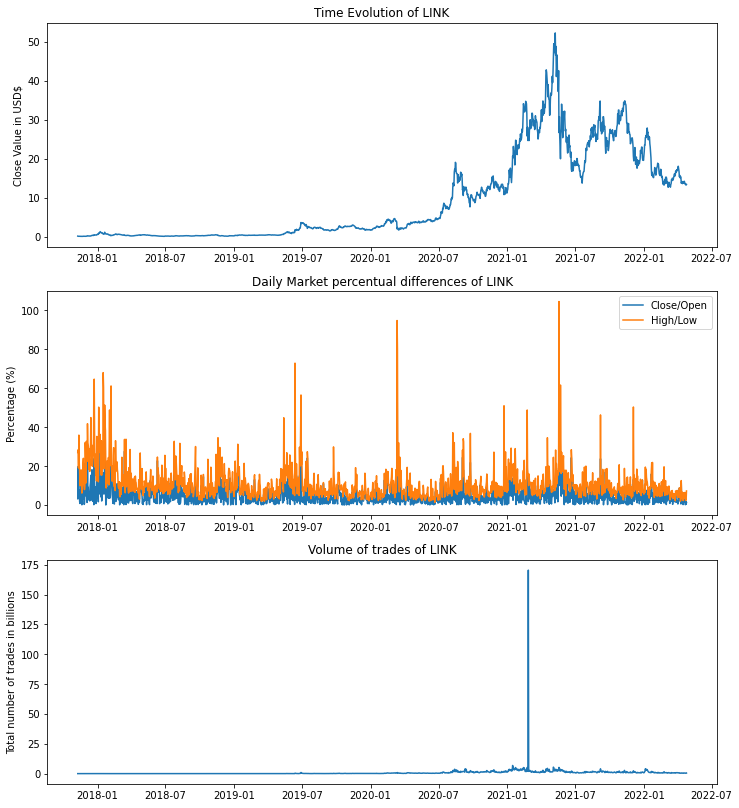

In [13]:
coin_name = plot_coinValue(df)

In [14]:
#FILTER DATASET
df = df.loc[df['Date']>= '2021-11-01']
df

,Date,LINK-USD_ADJCLOSE,LINK-USD_CLOSE,LINK-USD_HIGH,LINK-USD_LOW,LINK-USD_OPEN,LINK-USD_VOLUME,pctDiff_CloseOpen,pctDiff_HighLow
1453,2021-11-01,31.565237,31.565237,31.871412,29.208277,30.002562,1.143381e+09,4.950622,9.117743
1454,2021-11-02,32.265533,32.265533,32.496296,31.043903,31.685040,1.026698e+09,1.799115,4.678511
1455,2021-11-03,31.990866,31.990866,32.791611,30.673016,32.265514,1.115162e+09,0.858522,6.907032
1456,2021-11-04,31.020929,31.020929,32.101528,30.289692,31.971289,8.968978e+08,3.063607,5.981693
1457,2021-11-05,32.917904,32.917904,33.696304,30.725060,31.027643,1.516149e+09,5.742348,9.670428
...,...,...,...,...,...,...,...,...,...
1624,2022-04-21,13.588746,13.588746,14.346668,13.472289,14.022598,5.033146e+08,3.192732,6.490205
1625,2022-04-22,13.609354,13.609354,13.852832,13.506432,13.587431,4.649951e+08,0.161088,2.564706
1626,2022-04-23,13.343726,13.343726,13.643617,13.328945,13.609134,3.223842e+08,1.989006,2.360813
1627,2022-04-24,13.287423,13.287423,13.608301,13.275181,13.341961,2.993688e+08,0.410447,2.509347


# Modelling


## <font color='#5D6D7E'>Building LSTM Model</font> <a class="anchor" id="twentysecond-bullet"></a>
  [Back to TOC](#toc)

## Strategy

Create a DF (windowed_df) where the middle columns will correspond to the close values of X days before the target date and the final column will correspond to the close value of the target date. Use these values for prediction and play with the value of X

In [15]:
def get_windowed_df(X, df):
    start_Date = df['Date'] + pd.Timedelta(days=X)
    
    perm = np.zeros((1,X+1))
    
    #Get labels for DataFrame
    j=1
    labels=[]
    
    while j <= X:
        label = 'closeValue_' + str(j) + 'daysBefore'
        labels.append(label)
        
        j+=1
 
    labels.append('closeValue')
    
    for i in range(X,df.shape[0]):
        temp = np.zeros((1,X+1))
        
        #Date for i-th day
        #temp[0,0] = df.iloc[i]['Date']
        
        #Close values for k days before
        for k in range(X):           
            temp[0,k] = df.iloc[i-k-1,2]
            
        #Close value for i-th date
        temp[0,-1] = df.iloc[i,2]
        

        #Add values to the permanent frame
        perm = np.vstack((perm,temp))
        
        #Get the array in dataframe form
        windowed_df = pd.DataFrame(perm[1:,:], columns = labels)
        
    return windowed_df

In [16]:
#Get the dataframe and append the dates
windowed_df = get_windowed_df(4, df)
windowed_df['Date'] = df.iloc[4:]['Date'].reset_index(drop=True)
windowed_df

,closeValue_1daysBefore,closeValue_2daysBefore,closeValue_3daysBefore,closeValue_4daysBefore,closeValue,Date
0,31.020929,31.990866,32.265533,31.565237,32.917904,2021-11-05
1,32.917904,31.020929,31.990866,32.265533,32.083439,2021-11-06
2,32.083439,32.917904,31.020929,31.990866,32.349564,2021-11-07
3,32.349564,32.083439,32.917904,31.020929,34.477592,2021-11-08
4,34.477592,32.349564,32.083439,32.917904,33.859272,2021-11-09
...,...,...,...,...,...,...
167,14.024039,14.258342,14.037702,13.764988,13.588746,2022-04-21
168,13.588746,14.024039,14.258342,14.037702,13.609354,2022-04-22
169,13.609354,13.588746,14.024039,14.258342,13.343726,2022-04-23
170,13.343726,13.609354,13.588746,14.024039,13.287423,2022-04-24


In [17]:
#Get the X,y and dates into a numpy array to apply on a model

def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()

    dates = df_as_np[:, -1]

    middle_matrix = df_as_np[:, 0:-2]
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

    Y = df_as_np[:, -2]

    return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((172,), (172, 4, 1), (172,))

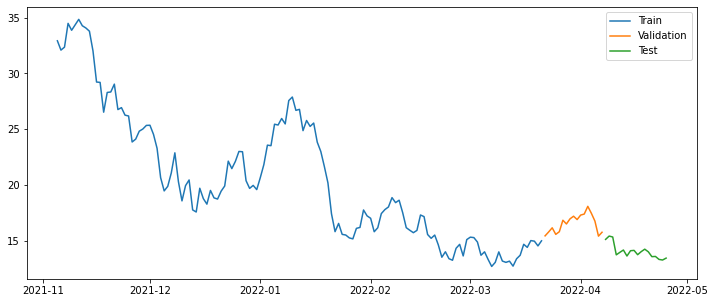

In [18]:
#Partition for train, validation and test

q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

fig,axs = plt.subplots(1, 1, figsize=(12,5))

#Plot the partitions
axs.plot(dates_train, y_train)
axs.plot(dates_val, y_val)
axs.plot(dates_test, y_test)

axs.legend(['Train', 'Validation', 'Test'])

fig.savefig('../analysis/'+coin_name +'_partition'+'.png')

## <font color='#5D6D7E'>Get Best Parameters for LSTM</font> <a class="anchor" id="twentythird-bullet"></a>
  [Back to TOC](#toc)

In [19]:
#!pip install tensorflow

In [20]:
#import os
#os.environ['PYTHONHASHSEED']= '0'
#import numpy as np
#np.random.seed(1)
#import random as rn
#rn.seed(1)
#import tensorflow as tf
#tf.random.set_seed(1)
#
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.optimizers import Adam
#from tensorflow.keras import layers
#from sklearn.metrics import mean_squared_error
#
## Function to create LSTM model and compute the MSE value for the given parameters
#def check_model(X_train, y_train, X_val, y_val, X_test, y_test, learning_rate,epoch,batch):
#    
#    # create model
#    model = Sequential([layers.Input((4, 1)),
#                        layers.LSTM(64),
#                        layers.Dense(32, activation='relu'),
#                        layers.Dense(32, activation='relu'),
#                        layers.Dense(1)])
#    # Compile model
#    model.compile(loss='mse', optimizer=Adam(learning_rate=learning_rate), metrics=['mean_absolute_error'])
#    
#    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epoch, shuffle=False, batch_size=batch, verbose=2)
#    
#    test_predictions = model.predict(X_test).flatten()
#    
#    LSTM_mse = mean_squared_error(y_test, test_predictions)
#    
#    return LSTM_mse
#
##Function that iterates the different parameters and gets the ones corresponding to the lowest MSE score.
#def search_parameters(batch_size, epochs, learn_rate, X_train, y_train, X_val, y_val, X_test, y_test):
#    
#    best_score = float('inf')
#    
#    for b in batch_size:
#        for e in epochs:
#            for l in learn_rate:
#                print('Batch Size: ' + str(b))
#                print('Number of Epochs: ' + str(e))
#                print('Value of Learning Rate: ' + str(l))
#                try:
#                    mse = check_model(X_train, y_train, X_val, y_val, X_test, y_test,l,e,b)
#                    print('MSE=%.3f' % (mse))
#                    if mse < best_score:
#                        best_score = mse
#                        top_params = [b, e, l]
#                except:
#                    continue
#                    
#    print('Best MSE=%.3f' % (best_score))
#    print('Optimal Batch Size: ' + str(top_params[0]))
#    print('Optimal Number of Epochs: ' + str(top_params[1]))
#    print('Optimal Value of Learning Rate: ' + str(top_params[2]))
#                        
#
## define parameters
#batch_size = [10, 100, 1000]
#epochs = [50, 100]
#learn_rate = np.linspace(0.001,0.1, num=10)
#
#warnings.filterwarnings("ignore")
#search_parameters(batch_size, epochs, learn_rate, X_train, y_train, X_val, y_val, X_test, y_test)

Batch Size: 10
Number of Epochs: 50
Value of Learning Rate: 0.001
Epoch 1/50
14/14 - 1s - loss: 460.3830 - mean_absolute_error: 20.5503 - val_loss: 258.5046 - val_mean_absolute_error: 16.0587 - 1s/epoch - 104ms/step
Epoch 2/50
14/14 - 0s - loss: 424.4952 - mean_absolute_error: 19.6777 - val_loss: 229.9214 - val_mean_absolute_error: 15.1426 - 44ms/epoch - 3ms/step
Epoch 3/50
14/14 - 0s - loss: 375.9597 - mean_absolute_error: 18.3090 - val_loss: 169.9070 - val_mean_absolute_error: 13.0107 - 40ms/epoch - 3ms/step
Epoch 4/50
14/14 - 0s - loss: 280.5295 - mean_absolute_error: 15.1430 - val_loss: 66.5011 - val_mean_absolute_error: 8.1152 - 41ms/epoch - 3ms/step
Epoch 5/50
14/14 - 0s - loss: 145.4186 - mean_absolute_error: 9.3429 - val_loss: 0.6366 - val_mean_absolute_error: 0.7079 - 40ms/epoch - 3ms/step
Epoch 6/50
14/14 - 0s - loss: 62.7144 - mean_absolute_error: 6.4656 - val_loss: 26.2507 - val_mean_absolute_error: 5.0628 - 41ms/epoch - 3ms/step
Epoch 7/50
14/14 - 0s - loss: 38.8505 - mean

Epoch 7/50
14/14 - 0s - loss: 24.7744 - mean_absolute_error: 3.7940 - val_loss: 7.9077 - val_mean_absolute_error: 2.6966 - 42ms/epoch - 3ms/step
Epoch 8/50
14/14 - 0s - loss: 14.6584 - mean_absolute_error: 2.7334 - val_loss: 8.3943 - val_mean_absolute_error: 2.7869 - 41ms/epoch - 3ms/step
Epoch 9/50
14/14 - 0s - loss: 10.9501 - mean_absolute_error: 2.3459 - val_loss: 6.4715 - val_mean_absolute_error: 2.4248 - 46ms/epoch - 3ms/step
Epoch 10/50
14/14 - 0s - loss: 10.7076 - mean_absolute_error: 2.3328 - val_loss: 7.6082 - val_mean_absolute_error: 2.6522 - 44ms/epoch - 3ms/step
Epoch 11/50
14/14 - 0s - loss: 11.3174 - mean_absolute_error: 2.4339 - val_loss: 7.2240 - val_mean_absolute_error: 2.5808 - 44ms/epoch - 3ms/step
Epoch 12/50
14/14 - 0s - loss: 11.7135 - mean_absolute_error: 2.5372 - val_loss: 6.1775 - val_mean_absolute_error: 2.3688 - 40ms/epoch - 3ms/step
Epoch 13/50
14/14 - 0s - loss: 9.7731 - mean_absolute_error: 2.3992 - val_loss: 3.9244 - val_mean_absolute_error: 1.8290 - 43ms

Epoch 13/50
14/14 - 0s - loss: 48.1065 - mean_absolute_error: 5.7197 - val_loss: 0.6213 - val_mean_absolute_error: 0.6986 - 39ms/epoch - 3ms/step
Epoch 14/50
14/14 - 0s - loss: 46.2885 - mean_absolute_error: 5.7336 - val_loss: 0.6223 - val_mean_absolute_error: 0.6712 - 40ms/epoch - 3ms/step
Epoch 15/50
14/14 - 0s - loss: 40.0363 - mean_absolute_error: 5.2608 - val_loss: 0.6298 - val_mean_absolute_error: 0.6730 - 39ms/epoch - 3ms/step
Epoch 16/50
14/14 - 0s - loss: 34.9854 - mean_absolute_error: 4.8981 - val_loss: 0.9421 - val_mean_absolute_error: 0.8117 - 39ms/epoch - 3ms/step
Epoch 17/50
14/14 - 0s - loss: 32.6419 - mean_absolute_error: 4.7216 - val_loss: 0.6680 - val_mean_absolute_error: 0.7177 - 38ms/epoch - 3ms/step
Epoch 18/50
14/14 - 0s - loss: 23.9816 - mean_absolute_error: 3.9325 - val_loss: 5.8323 - val_mean_absolute_error: 2.2885 - 38ms/epoch - 3ms/step
Epoch 19/50
14/14 - 0s - loss: 28.6863 - mean_absolute_error: 4.3275 - val_loss: 4.4934 - val_mean_absolute_error: 1.9739 - 

Epoch 19/50
14/14 - 0s - loss: 52.7336 - mean_absolute_error: 6.1104 - val_loss: 2.6960 - val_mean_absolute_error: 1.4494 - 46ms/epoch - 3ms/step
Epoch 20/50
14/14 - 0s - loss: 52.5085 - mean_absolute_error: 6.0959 - val_loss: 2.7851 - val_mean_absolute_error: 1.4764 - 45ms/epoch - 3ms/step
Epoch 21/50
14/14 - 0s - loss: 52.2586 - mean_absolute_error: 6.0798 - val_loss: 2.8692 - val_mean_absolute_error: 1.5014 - 46ms/epoch - 3ms/step
Epoch 22/50
14/14 - 0s - loss: 51.9736 - mean_absolute_error: 6.0596 - val_loss: 2.1152 - val_mean_absolute_error: 1.2575 - 44ms/epoch - 3ms/step
Epoch 23/50
14/14 - 0s - loss: 52.5185 - mean_absolute_error: 6.0723 - val_loss: 2.9636 - val_mean_absolute_error: 1.5289 - 45ms/epoch - 3ms/step
Epoch 24/50
14/14 - 0s - loss: 51.7575 - mean_absolute_error: 6.0494 - val_loss: 3.1332 - val_mean_absolute_error: 1.5830 - 41ms/epoch - 3ms/step
Epoch 25/50
14/14 - 0s - loss: 51.3225 - mean_absolute_error: 6.0181 - val_loss: 0.9416 - val_mean_absolute_error: 0.7841 - 

Epoch 25/50
14/14 - 0s - loss: 55.8461 - mean_absolute_error: 6.3229 - val_loss: 1.6902 - val_mean_absolute_error: 1.0899 - 41ms/epoch - 3ms/step
Epoch 26/50
14/14 - 0s - loss: 55.8115 - mean_absolute_error: 6.3095 - val_loss: 1.7321 - val_mean_absolute_error: 1.1078 - 41ms/epoch - 3ms/step
Epoch 27/50
14/14 - 0s - loss: 54.5730 - mean_absolute_error: 6.2277 - val_loss: 1.4956 - val_mean_absolute_error: 1.0024 - 39ms/epoch - 3ms/step
Epoch 28/50
14/14 - 0s - loss: 55.8958 - mean_absolute_error: 6.2884 - val_loss: 1.8325 - val_mean_absolute_error: 1.1489 - 40ms/epoch - 3ms/step
Epoch 29/50
14/14 - 0s - loss: 55.1678 - mean_absolute_error: 6.2819 - val_loss: 2.4063 - val_mean_absolute_error: 1.3574 - 40ms/epoch - 3ms/step
Epoch 30/50
14/14 - 0s - loss: 53.2714 - mean_absolute_error: 6.1439 - val_loss: 2.1933 - val_mean_absolute_error: 1.2844 - 42ms/epoch - 3ms/step
Epoch 31/50
14/14 - 0s - loss: 53.9159 - mean_absolute_error: 6.1918 - val_loss: 2.4570 - val_mean_absolute_error: 1.3738 - 

Epoch 26/50
14/14 - 0s - loss: 59.0905 - mean_absolute_error: 6.5292 - val_loss: 0.9943 - val_mean_absolute_error: 0.8026 - 42ms/epoch - 3ms/step
Epoch 27/50
14/14 - 0s - loss: 59.3244 - mean_absolute_error: 6.5319 - val_loss: 1.1668 - val_mean_absolute_error: 0.8637 - 43ms/epoch - 3ms/step
Epoch 28/50
14/14 - 0s - loss: 58.3255 - mean_absolute_error: 6.4756 - val_loss: 1.1772 - val_mean_absolute_error: 0.8675 - 40ms/epoch - 3ms/step
Epoch 29/50
14/14 - 0s - loss: 58.2625 - mean_absolute_error: 6.4764 - val_loss: 1.2668 - val_mean_absolute_error: 0.9040 - 41ms/epoch - 3ms/step
Epoch 30/50
14/14 - 0s - loss: 57.7587 - mean_absolute_error: 6.4424 - val_loss: 1.2952 - val_mean_absolute_error: 0.9154 - 40ms/epoch - 3ms/step
Epoch 31/50
14/14 - 0s - loss: 57.5837 - mean_absolute_error: 6.4320 - val_loss: 1.3594 - val_mean_absolute_error: 0.9419 - 43ms/epoch - 3ms/step
Epoch 32/50
14/14 - 0s - loss: 57.2482 - mean_absolute_error: 6.4106 - val_loss: 1.4105 - val_mean_absolute_error: 0.9644 - 

Epoch 27/50
14/14 - 0s - loss: 58.6214 - mean_absolute_error: 6.4971 - val_loss: 0.8830 - val_mean_absolute_error: 0.7593 - 43ms/epoch - 3ms/step
Epoch 28/50
14/14 - 0s - loss: 59.8746 - mean_absolute_error: 6.5444 - val_loss: 0.8506 - val_mean_absolute_error: 0.7457 - 41ms/epoch - 3ms/step
Epoch 29/50
14/14 - 0s - loss: 60.6799 - mean_absolute_error: 6.6590 - val_loss: 1.2684 - val_mean_absolute_error: 0.9047 - 43ms/epoch - 3ms/step
Epoch 30/50
14/14 - 0s - loss: 57.6217 - mean_absolute_error: 6.4280 - val_loss: 0.9089 - val_mean_absolute_error: 0.7670 - 40ms/epoch - 3ms/step
Epoch 31/50
14/14 - 0s - loss: 58.6982 - mean_absolute_error: 6.5131 - val_loss: 1.4129 - val_mean_absolute_error: 0.9654 - 42ms/epoch - 3ms/step
Epoch 32/50
14/14 - 0s - loss: 56.9972 - mean_absolute_error: 6.3899 - val_loss: 1.3317 - val_mean_absolute_error: 0.9297 - 47ms/epoch - 3ms/step
Epoch 33/50
14/14 - 0s - loss: 57.3415 - mean_absolute_error: 6.4205 - val_loss: 1.5426 - val_mean_absolute_error: 1.0244 - 

Epoch 33/50
14/14 - 0s - loss: 57.3195 - mean_absolute_error: 6.4233 - val_loss: 1.3876 - val_mean_absolute_error: 0.9544 - 45ms/epoch - 3ms/step
Epoch 34/50
14/14 - 0s - loss: 56.8920 - mean_absolute_error: 6.3961 - val_loss: 1.4759 - val_mean_absolute_error: 0.9930 - 48ms/epoch - 3ms/step
Epoch 35/50
14/14 - 0s - loss: 56.4452 - mean_absolute_error: 6.3675 - val_loss: 1.5687 - val_mean_absolute_error: 1.0363 - 45ms/epoch - 3ms/step
Epoch 36/50
14/14 - 0s - loss: 56.0017 - mean_absolute_error: 6.3387 - val_loss: 1.6652 - val_mean_absolute_error: 1.0791 - 44ms/epoch - 3ms/step
Epoch 37/50
14/14 - 0s - loss: 55.5643 - mean_absolute_error: 6.3107 - val_loss: 1.7697 - val_mean_absolute_error: 1.1233 - 43ms/epoch - 3ms/step
Epoch 38/50
14/14 - 0s - loss: 55.1151 - mean_absolute_error: 6.2819 - val_loss: 1.8792 - val_mean_absolute_error: 1.1675 - 44ms/epoch - 3ms/step
Epoch 39/50
14/14 - 0s - loss: 54.6668 - mean_absolute_error: 6.2530 - val_loss: 1.9967 - val_mean_absolute_error: 1.2128 - 

Epoch 39/50
14/14 - 0s - loss: 52.5749 - mean_absolute_error: 6.1066 - val_loss: 2.6258 - val_mean_absolute_error: 1.4276 - 53ms/epoch - 4ms/step
Epoch 40/50
14/14 - 0s - loss: 52.3994 - mean_absolute_error: 6.0951 - val_loss: 2.6801 - val_mean_absolute_error: 1.4444 - 51ms/epoch - 4ms/step
Epoch 41/50
14/14 - 0s - loss: 52.2401 - mean_absolute_error: 6.0843 - val_loss: 2.7403 - val_mean_absolute_error: 1.4628 - 48ms/epoch - 3ms/step
Epoch 42/50
14/14 - 0s - loss: 52.0550 - mean_absolute_error: 6.0726 - val_loss: 2.7961 - val_mean_absolute_error: 1.4797 - 45ms/epoch - 3ms/step
Epoch 43/50
14/14 - 0s - loss: 51.8898 - mean_absolute_error: 6.0619 - val_loss: 2.8544 - val_mean_absolute_error: 1.4970 - 44ms/epoch - 3ms/step
Epoch 44/50
14/14 - 0s - loss: 51.7210 - mean_absolute_error: 6.0508 - val_loss: 2.9110 - val_mean_absolute_error: 1.5136 - 40ms/epoch - 3ms/step
Epoch 45/50
14/14 - 0s - loss: 51.5586 - mean_absolute_error: 6.0402 - val_loss: 2.9691 - val_mean_absolute_error: 1.5305 - 

Epoch 45/50
14/14 - 0s - loss: 49.4895 - mean_absolute_error: 5.9091 - val_loss: 3.6407 - val_mean_absolute_error: 1.7359 - 48ms/epoch - 3ms/step
Epoch 46/50
14/14 - 0s - loss: 48.9289 - mean_absolute_error: 5.8672 - val_loss: 4.1734 - val_mean_absolute_error: 1.8831 - 46ms/epoch - 3ms/step
Epoch 47/50
14/14 - 0s - loss: 47.7937 - mean_absolute_error: 5.7915 - val_loss: 4.4697 - val_mean_absolute_error: 1.9602 - 44ms/epoch - 3ms/step
Epoch 48/50
14/14 - 0s - loss: 47.1488 - mean_absolute_error: 5.7462 - val_loss: 4.8280 - val_mean_absolute_error: 2.0495 - 41ms/epoch - 3ms/step
Epoch 49/50
14/14 - 0s - loss: 46.3982 - mean_absolute_error: 5.6942 - val_loss: 5.2439 - val_mean_absolute_error: 2.1486 - 48ms/epoch - 3ms/step
Epoch 50/50
14/14 - 0s - loss: 45.6275 - mean_absolute_error: 5.6397 - val_loss: 5.6747 - val_mean_absolute_error: 2.2466 - 48ms/epoch - 3ms/step
MSE=22.919
Batch Size: 10
Number of Epochs: 100
Value of Learning Rate: 0.001
Epoch 1/100
14/14 - 2s - loss: 396.5114 - mean

Epoch 51/100
14/14 - 0s - loss: 2.0825 - mean_absolute_error: 1.1675 - val_loss: 0.7015 - val_mean_absolute_error: 0.7329 - 46ms/epoch - 3ms/step
Epoch 52/100
14/14 - 0s - loss: 2.0579 - mean_absolute_error: 1.1615 - val_loss: 0.7086 - val_mean_absolute_error: 0.7363 - 44ms/epoch - 3ms/step
Epoch 53/100
14/14 - 0s - loss: 2.0345 - mean_absolute_error: 1.1557 - val_loss: 0.7105 - val_mean_absolute_error: 0.7361 - 49ms/epoch - 4ms/step
Epoch 54/100
14/14 - 0s - loss: 2.0123 - mean_absolute_error: 1.1496 - val_loss: 0.7141 - val_mean_absolute_error: 0.7370 - 44ms/epoch - 3ms/step
Epoch 55/100
14/14 - 0s - loss: 1.9915 - mean_absolute_error: 1.1441 - val_loss: 0.7187 - val_mean_absolute_error: 0.7385 - 44ms/epoch - 3ms/step
Epoch 56/100
14/14 - 0s - loss: 1.9706 - mean_absolute_error: 1.1382 - val_loss: 0.7226 - val_mean_absolute_error: 0.7409 - 42ms/epoch - 3ms/step
Epoch 57/100
14/14 - 0s - loss: 1.9512 - mean_absolute_error: 1.1324 - val_loss: 0.7241 - val_mean_absolute_error: 0.7435 - 

Epoch 7/100
14/14 - 0s - loss: 29.1521 - mean_absolute_error: 4.0880 - val_loss: 8.7521 - val_mean_absolute_error: 2.7984 - 45ms/epoch - 3ms/step
Epoch 8/100
14/14 - 0s - loss: 14.8284 - mean_absolute_error: 2.8891 - val_loss: 8.0214 - val_mean_absolute_error: 2.6460 - 47ms/epoch - 3ms/step
Epoch 9/100
14/14 - 0s - loss: 9.1846 - mean_absolute_error: 2.3028 - val_loss: 4.9089 - val_mean_absolute_error: 2.0656 - 47ms/epoch - 3ms/step
Epoch 10/100
14/14 - 0s - loss: 8.2419 - mean_absolute_error: 2.1958 - val_loss: 5.6873 - val_mean_absolute_error: 2.2190 - 45ms/epoch - 3ms/step
Epoch 11/100
14/14 - 0s - loss: 10.7287 - mean_absolute_error: 2.4260 - val_loss: 9.1575 - val_mean_absolute_error: 2.9011 - 59ms/epoch - 4ms/step
Epoch 12/100
14/14 - 0s - loss: 12.9789 - mean_absolute_error: 2.6218 - val_loss: 10.3107 - val_mean_absolute_error: 3.0974 - 49ms/epoch - 4ms/step
Epoch 13/100
14/14 - 0s - loss: 13.3099 - mean_absolute_error: 2.6432 - val_loss: 8.6101 - val_mean_absolute_error: 2.8070

14/14 - 0s - loss: 4.0919 - mean_absolute_error: 1.5812 - val_loss: 1.0579 - val_mean_absolute_error: 0.7026 - 40ms/epoch - 3ms/step
Epoch 64/100
14/14 - 0s - loss: 4.1483 - mean_absolute_error: 1.6309 - val_loss: 1.8581 - val_mean_absolute_error: 1.2689 - 38ms/epoch - 3ms/step
Epoch 65/100
14/14 - 0s - loss: 5.6757 - mean_absolute_error: 1.7622 - val_loss: 6.5498 - val_mean_absolute_error: 2.4686 - 38ms/epoch - 3ms/step
Epoch 66/100
14/14 - 0s - loss: 7.6057 - mean_absolute_error: 2.0746 - val_loss: 8.9492 - val_mean_absolute_error: 2.9125 - 39ms/epoch - 3ms/step
Epoch 67/100
14/14 - 0s - loss: 14.3048 - mean_absolute_error: 2.6572 - val_loss: 10.9527 - val_mean_absolute_error: 3.2346 - 40ms/epoch - 3ms/step
Epoch 68/100
14/14 - 0s - loss: 16.2635 - mean_absolute_error: 3.0258 - val_loss: 10.5619 - val_mean_absolute_error: 3.1757 - 42ms/epoch - 3ms/step
Epoch 69/100
14/14 - 0s - loss: 12.3220 - mean_absolute_error: 2.8130 - val_loss: 5.5052 - val_mean_absolute_error: 2.2393 - 37ms/epo

Epoch 19/100
14/14 - 0s - loss: 11.1346 - mean_absolute_error: 2.6758 - val_loss: 5.6339 - val_mean_absolute_error: 2.2410 - 39ms/epoch - 3ms/step
Epoch 20/100
14/14 - 0s - loss: 9.6875 - mean_absolute_error: 2.4045 - val_loss: 5.4463 - val_mean_absolute_error: 2.1857 - 39ms/epoch - 3ms/step
Epoch 21/100
14/14 - 0s - loss: 7.5683 - mean_absolute_error: 2.1231 - val_loss: 5.1649 - val_mean_absolute_error: 2.1216 - 38ms/epoch - 3ms/step
Epoch 22/100
14/14 - 0s - loss: 6.8756 - mean_absolute_error: 2.0546 - val_loss: 5.1720 - val_mean_absolute_error: 2.1175 - 38ms/epoch - 3ms/step
Epoch 23/100
14/14 - 0s - loss: 6.7460 - mean_absolute_error: 2.0272 - val_loss: 5.0845 - val_mean_absolute_error: 2.0975 - 38ms/epoch - 3ms/step
Epoch 24/100
14/14 - 0s - loss: 6.5542 - mean_absolute_error: 2.0017 - val_loss: 5.4277 - val_mean_absolute_error: 2.1826 - 38ms/epoch - 3ms/step
Epoch 25/100
14/14 - 0s - loss: 6.6423 - mean_absolute_error: 2.0171 - val_loss: 5.7783 - val_mean_absolute_error: 2.2613 -

Epoch 75/100
14/14 - 0s - loss: 14.8904 - mean_absolute_error: 2.8295 - val_loss: 16.7692 - val_mean_absolute_error: 4.0431 - 41ms/epoch - 3ms/step
Epoch 76/100
14/14 - 0s - loss: 22.7191 - mean_absolute_error: 3.4560 - val_loss: 20.2195 - val_mean_absolute_error: 4.4387 - 38ms/epoch - 3ms/step
Epoch 77/100
14/14 - 0s - loss: 30.1562 - mean_absolute_error: 4.4631 - val_loss: 15.1462 - val_mean_absolute_error: 3.8198 - 38ms/epoch - 3ms/step
Epoch 78/100
14/14 - 0s - loss: 43.9493 - mean_absolute_error: 5.8254 - val_loss: 6.0760 - val_mean_absolute_error: 2.3273 - 39ms/epoch - 3ms/step
Epoch 79/100
14/14 - 0s - loss: 14.3551 - mean_absolute_error: 2.7807 - val_loss: 1.2599 - val_mean_absolute_error: 1.0118 - 38ms/epoch - 3ms/step
Epoch 80/100
14/14 - 0s - loss: 11.4083 - mean_absolute_error: 2.4401 - val_loss: 3.8101 - val_mean_absolute_error: 1.8232 - 38ms/epoch - 3ms/step
Epoch 81/100
14/14 - 0s - loss: 12.4712 - mean_absolute_error: 2.6794 - val_loss: 11.2903 - val_mean_absolute_error

Epoch 31/100
14/14 - 0s - loss: 37.1719 - mean_absolute_error: 4.1726 - val_loss: 2.1428 - val_mean_absolute_error: 1.2631 - 41ms/epoch - 3ms/step
Epoch 32/100
14/14 - 0s - loss: 55.4886 - mean_absolute_error: 5.3307 - val_loss: 16.3350 - val_mean_absolute_error: 3.9635 - 40ms/epoch - 3ms/step
Epoch 33/100
14/14 - 0s - loss: 70.0652 - mean_absolute_error: 6.6821 - val_loss: 5.8159 - val_mean_absolute_error: 2.2799 - 43ms/epoch - 3ms/step
Epoch 34/100
14/14 - 0s - loss: 68.0756 - mean_absolute_error: 7.1695 - val_loss: 4.6183 - val_mean_absolute_error: 2.0207 - 47ms/epoch - 3ms/step
Epoch 35/100
14/14 - 0s - loss: 30.8171 - mean_absolute_error: 4.5502 - val_loss: 0.8882 - val_mean_absolute_error: 0.7979 - 47ms/epoch - 3ms/step
Epoch 36/100
14/14 - 0s - loss: 35.8484 - mean_absolute_error: 4.9610 - val_loss: 1.1556 - val_mean_absolute_error: 0.9481 - 53ms/epoch - 4ms/step
Epoch 37/100
14/14 - 0s - loss: 19.0124 - mean_absolute_error: 3.2641 - val_loss: 6.7104 - val_mean_absolute_error: 2

Epoch 87/100
14/14 - 0s - loss: 16.1253 - mean_absolute_error: 2.8302 - val_loss: 6.2179 - val_mean_absolute_error: 2.3677 - 54ms/epoch - 4ms/step
Epoch 88/100
14/14 - 0s - loss: 20.5602 - mean_absolute_error: 3.2591 - val_loss: 22.6503 - val_mean_absolute_error: 4.6693 - 49ms/epoch - 4ms/step
Epoch 89/100
14/14 - 0s - loss: 45.5622 - mean_absolute_error: 5.4716 - val_loss: 16.9815 - val_mean_absolute_error: 4.0528 - 50ms/epoch - 4ms/step
Epoch 90/100
14/14 - 0s - loss: 38.0892 - mean_absolute_error: 4.9911 - val_loss: 9.1520 - val_mean_absolute_error: 2.8561 - 46ms/epoch - 3ms/step
Epoch 91/100
14/14 - 0s - loss: 12.1372 - mean_absolute_error: 2.9053 - val_loss: 5.5167 - val_mean_absolute_error: 1.9345 - 43ms/epoch - 3ms/step
Epoch 92/100
14/14 - 0s - loss: 14.9990 - mean_absolute_error: 3.3059 - val_loss: 6.6416 - val_mean_absolute_error: 2.3553 - 42ms/epoch - 3ms/step
Epoch 93/100
14/14 - 0s - loss: 30.3067 - mean_absolute_error: 4.1935 - val_loss: 11.3253 - val_mean_absolute_error:

Epoch 43/100
14/14 - 0s - loss: 52.1259 - mean_absolute_error: 6.0710 - val_loss: 2.7742 - val_mean_absolute_error: 1.4731 - 39ms/epoch - 3ms/step
Epoch 44/100
14/14 - 0s - loss: 52.0804 - mean_absolute_error: 6.0680 - val_loss: 1.7625 - val_mean_absolute_error: 1.1199 - 41ms/epoch - 3ms/step
Epoch 45/100
14/14 - 0s - loss: 55.0468 - mean_absolute_error: 6.2648 - val_loss: 3.6556 - val_mean_absolute_error: 1.7402 - 38ms/epoch - 3ms/step
Epoch 46/100
14/14 - 0s - loss: 49.5847 - mean_absolute_error: 5.8777 - val_loss: 0.6922 - val_mean_absolute_error: 0.6894 - 40ms/epoch - 3ms/step
Epoch 47/100
14/14 - 0s - loss: 60.9072 - mean_absolute_error: 6.5851 - val_loss: 2.6309 - val_mean_absolute_error: 1.4286 - 39ms/epoch - 3ms/step
Epoch 48/100
14/14 - 0s - loss: 51.0818 - mean_absolute_error: 6.0028 - val_loss: 0.7757 - val_mean_absolute_error: 0.7128 - 40ms/epoch - 3ms/step
Epoch 49/100
14/14 - 0s - loss: 59.9544 - mean_absolute_error: 6.5122 - val_loss: 0.8696 - val_mean_absolute_error: 0.

Epoch 99/100
14/14 - 0s - loss: 25.3113 - mean_absolute_error: 4.1185 - val_loss: 2.2895 - val_mean_absolute_error: 1.3164 - 43ms/epoch - 3ms/step
Epoch 100/100
14/14 - 0s - loss: 24.4066 - mean_absolute_error: 4.0429 - val_loss: 1.9694 - val_mean_absolute_error: 1.2012 - 45ms/epoch - 3ms/step
MSE=13.724
Batch Size: 10
Number of Epochs: 100
Value of Learning Rate: 0.05600000000000001
Epoch 1/100
14/14 - 1s - loss: 157.6551 - mean_absolute_error: 9.1595 - val_loss: 13.5524 - val_mean_absolute_error: 3.5961 - 1s/epoch - 104ms/step
Epoch 2/100
14/14 - 0s - loss: 66.2987 - mean_absolute_error: 5.9921 - val_loss: 42.9331 - val_mean_absolute_error: 6.5043 - 45ms/epoch - 3ms/step
Epoch 3/100
14/14 - 0s - loss: 87.5450 - mean_absolute_error: 6.9939 - val_loss: 66.7060 - val_mean_absolute_error: 8.1289 - 44ms/epoch - 3ms/step
Epoch 4/100
14/14 - 0s - loss: 146.4730 - mean_absolute_error: 10.1348 - val_loss: 25.3047 - val_mean_absolute_error: 4.9676 - 42ms/epoch - 3ms/step
Epoch 5/100
14/14 - 0s

Epoch 55/100
14/14 - 0s - loss: 52.0669 - mean_absolute_error: 6.0986 - val_loss: 4.3353 - val_mean_absolute_error: 1.9256 - 47ms/epoch - 3ms/step
Epoch 56/100
14/14 - 0s - loss: 48.5793 - mean_absolute_error: 5.8345 - val_loss: 3.1277 - val_mean_absolute_error: 1.5812 - 45ms/epoch - 3ms/step
Epoch 57/100
14/14 - 0s - loss: 50.6056 - mean_absolute_error: 5.9870 - val_loss: 4.1686 - val_mean_absolute_error: 1.8818 - 45ms/epoch - 3ms/step
Epoch 58/100
14/14 - 0s - loss: 48.7099 - mean_absolute_error: 5.8475 - val_loss: 3.5988 - val_mean_absolute_error: 1.7238 - 46ms/epoch - 3ms/step
Epoch 59/100
14/14 - 0s - loss: 49.5674 - mean_absolute_error: 5.9127 - val_loss: 4.1752 - val_mean_absolute_error: 1.8836 - 44ms/epoch - 3ms/step
Epoch 60/100
14/14 - 0s - loss: 48.5642 - mean_absolute_error: 5.8398 - val_loss: 3.9451 - val_mean_absolute_error: 1.8215 - 43ms/epoch - 3ms/step
Epoch 61/100
14/14 - 0s - loss: 48.8342 - mean_absolute_error: 5.8618 - val_loss: 4.2937 - val_mean_absolute_error: 1.

Epoch 11/100
14/14 - 0s - loss: 67.7911 - mean_absolute_error: 7.0886 - val_loss: 0.6276 - val_mean_absolute_error: 0.7001 - 39ms/epoch - 3ms/step
Epoch 12/100
14/14 - 0s - loss: 65.2524 - mean_absolute_error: 6.9254 - val_loss: 0.6398 - val_mean_absolute_error: 0.6929 - 40ms/epoch - 3ms/step
Epoch 13/100
14/14 - 0s - loss: 64.0372 - mean_absolute_error: 6.8518 - val_loss: 0.7124 - val_mean_absolute_error: 0.6921 - 40ms/epoch - 3ms/step
Epoch 14/100
14/14 - 0s - loss: 62.3851 - mean_absolute_error: 6.7471 - val_loss: 0.8018 - val_mean_absolute_error: 0.7231 - 39ms/epoch - 3ms/step
Epoch 15/100
14/14 - 0s - loss: 61.2160 - mean_absolute_error: 6.6726 - val_loss: 0.9426 - val_mean_absolute_error: 0.7823 - 41ms/epoch - 3ms/step
Epoch 16/100
14/14 - 0s - loss: 59.9261 - mean_absolute_error: 6.5883 - val_loss: 1.0892 - val_mean_absolute_error: 0.8347 - 40ms/epoch - 3ms/step
Epoch 17/100
14/14 - 0s - loss: 58.8626 - mean_absolute_error: 6.5174 - val_loss: 1.2504 - val_mean_absolute_error: 0.

Epoch 67/100
14/14 - 0s - loss: 47.5566 - mean_absolute_error: 5.7738 - val_loss: 4.7867 - val_mean_absolute_error: 2.0394 - 38ms/epoch - 3ms/step
Epoch 68/100
14/14 - 0s - loss: 47.4983 - mean_absolute_error: 5.7699 - val_loss: 4.8155 - val_mean_absolute_error: 2.0465 - 39ms/epoch - 3ms/step
Epoch 69/100
14/14 - 0s - loss: 47.4405 - mean_absolute_error: 5.7661 - val_loss: 4.8442 - val_mean_absolute_error: 2.0535 - 40ms/epoch - 3ms/step
Epoch 70/100
14/14 - 0s - loss: 47.3831 - mean_absolute_error: 5.7622 - val_loss: 4.8728 - val_mean_absolute_error: 2.0604 - 39ms/epoch - 3ms/step
Epoch 71/100
14/14 - 0s - loss: 47.3262 - mean_absolute_error: 5.7584 - val_loss: 4.9012 - val_mean_absolute_error: 2.0673 - 39ms/epoch - 3ms/step
Epoch 72/100
14/14 - 0s - loss: 47.2697 - mean_absolute_error: 5.7546 - val_loss: 4.9296 - val_mean_absolute_error: 2.0742 - 39ms/epoch - 3ms/step
Epoch 73/100
14/14 - 0s - loss: 47.2136 - mean_absolute_error: 5.7508 - val_loss: 4.9579 - val_mean_absolute_error: 2.

14/14 - 0s - loss: 64.7887 - mean_absolute_error: 6.8803 - val_loss: 0.6995 - val_mean_absolute_error: 0.6903 - 41ms/epoch - 3ms/step
Epoch 23/100
14/14 - 0s - loss: 62.3210 - mean_absolute_error: 6.7517 - val_loss: 0.7348 - val_mean_absolute_error: 0.6985 - 40ms/epoch - 3ms/step
Epoch 24/100
14/14 - 0s - loss: 61.7580 - mean_absolute_error: 6.7200 - val_loss: 0.8351 - val_mean_absolute_error: 0.7388 - 43ms/epoch - 3ms/step
Epoch 25/100
14/14 - 0s - loss: 60.3092 - mean_absolute_error: 6.6239 - val_loss: 0.8900 - val_mean_absolute_error: 0.7622 - 39ms/epoch - 3ms/step
Epoch 26/100
14/14 - 0s - loss: 59.9273 - mean_absolute_error: 6.5909 - val_loss: 0.7025 - val_mean_absolute_error: 0.7425 - 39ms/epoch - 3ms/step
Epoch 27/100
14/14 - 0s - loss: 61.3497 - mean_absolute_error: 6.6002 - val_loss: 1.0991 - val_mean_absolute_error: 0.8385 - 39ms/epoch - 3ms/step
Epoch 28/100
14/14 - 0s - loss: 58.5025 - mean_absolute_error: 6.5100 - val_loss: 1.3081 - val_mean_absolute_error: 0.9205 - 39ms/e

Epoch 78/100
14/14 - 0s - loss: 37.8283 - mean_absolute_error: 5.1118 - val_loss: 12.2445 - val_mean_absolute_error: 3.4084 - 47ms/epoch - 3ms/step
Epoch 79/100
14/14 - 0s - loss: 37.7968 - mean_absolute_error: 5.1102 - val_loss: 12.2869 - val_mean_absolute_error: 3.4146 - 48ms/epoch - 3ms/step
Epoch 80/100
14/14 - 0s - loss: 37.7629 - mean_absolute_error: 5.1080 - val_loss: 12.3122 - val_mean_absolute_error: 3.4183 - 43ms/epoch - 3ms/step
Epoch 81/100
14/14 - 0s - loss: 37.7420 - mean_absolute_error: 5.1067 - val_loss: 12.3419 - val_mean_absolute_error: 3.4226 - 46ms/epoch - 3ms/step
Epoch 82/100
14/14 - 0s - loss: 37.7217 - mean_absolute_error: 5.1055 - val_loss: 12.3713 - val_mean_absolute_error: 3.4269 - 47ms/epoch - 3ms/step
Epoch 83/100
14/14 - 0s - loss: 37.7010 - mean_absolute_error: 5.1043 - val_loss: 12.3956 - val_mean_absolute_error: 3.4305 - 43ms/epoch - 3ms/step
Epoch 84/100
14/14 - 0s - loss: 37.6828 - mean_absolute_error: 5.1032 - val_loss: 12.4169 - val_mean_absolute_er

Epoch 33/100
14/14 - 0s - loss: 52.8178 - mean_absolute_error: 6.1209 - val_loss: 2.5972 - val_mean_absolute_error: 1.4187 - 46ms/epoch - 3ms/step
Epoch 34/100
14/14 - 0s - loss: 52.6324 - mean_absolute_error: 6.1062 - val_loss: 2.5884 - val_mean_absolute_error: 1.4159 - 48ms/epoch - 3ms/step
Epoch 35/100
14/14 - 0s - loss: 52.6328 - mean_absolute_error: 6.1078 - val_loss: 2.6615 - val_mean_absolute_error: 1.4387 - 47ms/epoch - 3ms/step
Epoch 36/100
14/14 - 0s - loss: 52.4260 - mean_absolute_error: 6.0937 - val_loss: 2.6748 - val_mean_absolute_error: 1.4428 - 46ms/epoch - 3ms/step
Epoch 37/100
14/14 - 0s - loss: 52.3705 - mean_absolute_error: 6.0907 - val_loss: 2.7293 - val_mean_absolute_error: 1.4595 - 45ms/epoch - 3ms/step
Epoch 38/100
14/14 - 0s - loss: 52.2148 - mean_absolute_error: 6.0804 - val_loss: 2.7578 - val_mean_absolute_error: 1.4682 - 45ms/epoch - 3ms/step
Epoch 39/100
14/14 - 0s - loss: 52.1240 - mean_absolute_error: 6.0747 - val_loss: 2.8044 - val_mean_absolute_error: 1.

Epoch 89/100
14/14 - 0s - loss: 45.0990 - mean_absolute_error: 5.6052 - val_loss: 6.0102 - val_mean_absolute_error: 2.3201 - 43ms/epoch - 3ms/step
Epoch 90/100
14/14 - 0s - loss: 44.9552 - mean_absolute_error: 5.5951 - val_loss: 6.0944 - val_mean_absolute_error: 2.3382 - 41ms/epoch - 3ms/step
Epoch 91/100
14/14 - 0s - loss: 44.8094 - mean_absolute_error: 5.5849 - val_loss: 6.1808 - val_mean_absolute_error: 2.3566 - 43ms/epoch - 3ms/step
Epoch 92/100
14/14 - 0s - loss: 44.6610 - mean_absolute_error: 5.5744 - val_loss: 6.2696 - val_mean_absolute_error: 2.3753 - 44ms/epoch - 3ms/step
Epoch 93/100
14/14 - 0s - loss: 44.5102 - mean_absolute_error: 5.5638 - val_loss: 6.3609 - val_mean_absolute_error: 2.3945 - 42ms/epoch - 3ms/step
Epoch 94/100
14/14 - 0s - loss: 44.3566 - mean_absolute_error: 5.5529 - val_loss: 6.4549 - val_mean_absolute_error: 2.4140 - 41ms/epoch - 3ms/step
Epoch 95/100
14/14 - 0s - loss: 44.2002 - mean_absolute_error: 5.5418 - val_loss: 6.5517 - val_mean_absolute_error: 2.

Epoch 45/100
14/14 - 0s - loss: 39.0073 - mean_absolute_error: 5.1937 - val_loss: 11.2096 - val_mean_absolute_error: 3.2530 - 43ms/epoch - 3ms/step
Epoch 46/100
14/14 - 0s - loss: 38.9072 - mean_absolute_error: 5.1879 - val_loss: 11.2594 - val_mean_absolute_error: 3.2607 - 44ms/epoch - 3ms/step
Epoch 47/100
14/14 - 0s - loss: 38.8685 - mean_absolute_error: 5.1856 - val_loss: 11.2745 - val_mean_absolute_error: 3.2630 - 55ms/epoch - 4ms/step
Epoch 48/100
14/14 - 0s - loss: 38.8525 - mean_absolute_error: 5.1845 - val_loss: 11.2866 - val_mean_absolute_error: 3.2648 - 61ms/epoch - 4ms/step
Epoch 49/100
14/14 - 0s - loss: 38.8417 - mean_absolute_error: 5.1839 - val_loss: 11.3025 - val_mean_absolute_error: 3.2673 - 47ms/epoch - 3ms/step
Epoch 50/100
14/14 - 0s - loss: 38.8281 - mean_absolute_error: 5.1830 - val_loss: 11.3159 - val_mean_absolute_error: 3.2693 - 46ms/epoch - 3ms/step
Epoch 51/100
14/14 - 0s - loss: 38.8156 - mean_absolute_error: 5.1822 - val_loss: 11.3282 - val_mean_absolute_er

MSE=34.458
Batch Size: 100
Number of Epochs: 50
Value of Learning Rate: 0.001
Epoch 1/50
2/2 - 1s - loss: 457.4032 - mean_absolute_error: 20.5448 - val_loss: 271.6891 - val_mean_absolute_error: 16.4639 - 1s/epoch - 691ms/step
Epoch 2/50
2/2 - 0s - loss: 454.3990 - mean_absolute_error: 20.4727 - val_loss: 269.7535 - val_mean_absolute_error: 16.4051 - 21ms/epoch - 11ms/step
Epoch 3/50
2/2 - 0s - loss: 451.8350 - mean_absolute_error: 20.4095 - val_loss: 267.7152 - val_mean_absolute_error: 16.3427 - 20ms/epoch - 10ms/step
Epoch 4/50
2/2 - 0s - loss: 449.3326 - mean_absolute_error: 20.3453 - val_loss: 265.0480 - val_mean_absolute_error: 16.2608 - 20ms/epoch - 10ms/step
Epoch 5/50
2/2 - 0s - loss: 446.5610 - mean_absolute_error: 20.2734 - val_loss: 261.9601 - val_mean_absolute_error: 16.1655 - 20ms/epoch - 10ms/step
Epoch 6/50
2/2 - 0s - loss: 443.4736 - mean_absolute_error: 20.1926 - val_loss: 258.4965 - val_mean_absolute_error: 16.0580 - 21ms/epoch - 11ms/step
Epoch 7/50
2/2 - 0s - loss: 4

Epoch 6/50
2/2 - 0s - loss: 49.7180 - mean_absolute_error: 6.1491 - val_loss: 39.0284 - val_mean_absolute_error: 6.1971 - 21ms/epoch - 11ms/step
Epoch 7/50
2/2 - 0s - loss: 34.7775 - mean_absolute_error: 5.1641 - val_loss: 11.2206 - val_mean_absolute_error: 3.2557 - 22ms/epoch - 11ms/step
Epoch 8/50
2/2 - 0s - loss: 31.9502 - mean_absolute_error: 4.4896 - val_loss: 1.2441 - val_mean_absolute_error: 0.8942 - 24ms/epoch - 12ms/step
Epoch 9/50
2/2 - 0s - loss: 43.1582 - mean_absolute_error: 4.8223 - val_loss: 1.0462 - val_mean_absolute_error: 0.8371 - 23ms/epoch - 12ms/step
Epoch 10/50
2/2 - 0s - loss: 54.7818 - mean_absolute_error: 5.3939 - val_loss: 1.8319 - val_mean_absolute_error: 1.1122 - 23ms/epoch - 12ms/step
Epoch 11/50
2/2 - 0s - loss: 58.9167 - mean_absolute_error: 5.6629 - val_loss: 1.1499 - val_mean_absolute_error: 0.8624 - 26ms/epoch - 13ms/step
Epoch 12/50
2/2 - 0s - loss: 55.4497 - mean_absolute_error: 5.5630 - val_loss: 0.6437 - val_mean_absolute_error: 0.6757 - 23ms/epoch

Epoch 12/50
2/2 - 0s - loss: 41.1420 - mean_absolute_error: 5.1441 - val_loss: 15.4360 - val_mean_absolute_error: 3.8491 - 25ms/epoch - 13ms/step
Epoch 13/50
2/2 - 0s - loss: 36.9872 - mean_absolute_error: 5.0774 - val_loss: 20.0636 - val_mean_absolute_error: 4.4097 - 21ms/epoch - 11ms/step
Epoch 14/50
2/2 - 0s - loss: 34.6609 - mean_absolute_error: 4.9949 - val_loss: 14.2102 - val_mean_absolute_error: 3.6872 - 19ms/epoch - 10ms/step
Epoch 15/50
2/2 - 0s - loss: 32.7576 - mean_absolute_error: 4.7099 - val_loss: 5.8286 - val_mean_absolute_error: 2.2833 - 19ms/epoch - 10ms/step
Epoch 16/50
2/2 - 0s - loss: 35.2306 - mean_absolute_error: 4.6153 - val_loss: 1.6736 - val_mean_absolute_error: 1.0848 - 21ms/epoch - 11ms/step
Epoch 17/50
2/2 - 0s - loss: 41.5864 - mean_absolute_error: 4.8499 - val_loss: 0.7736 - val_mean_absolute_error: 0.7122 - 20ms/epoch - 10ms/step
Epoch 18/50
2/2 - 0s - loss: 46.2050 - mean_absolute_error: 5.1083 - val_loss: 0.8126 - val_mean_absolute_error: 0.7281 - 20ms/

Epoch 18/50
2/2 - 0s - loss: 33.0453 - mean_absolute_error: 4.4606 - val_loss: 2.2217 - val_mean_absolute_error: 1.2944 - 21ms/epoch - 11ms/step
Epoch 19/50
2/2 - 0s - loss: 29.2691 - mean_absolute_error: 4.2207 - val_loss: 3.1834 - val_mean_absolute_error: 1.6179 - 22ms/epoch - 11ms/step
Epoch 20/50
2/2 - 0s - loss: 26.1808 - mean_absolute_error: 4.0126 - val_loss: 3.2614 - val_mean_absolute_error: 1.6419 - 21ms/epoch - 11ms/step
Epoch 21/50
2/2 - 0s - loss: 24.0568 - mean_absolute_error: 3.8311 - val_loss: 2.0096 - val_mean_absolute_error: 1.2127 - 21ms/epoch - 11ms/step
Epoch 22/50
2/2 - 0s - loss: 23.0144 - mean_absolute_error: 3.6997 - val_loss: 1.3455 - val_mean_absolute_error: 0.9299 - 19ms/epoch - 10ms/step
Epoch 23/50
2/2 - 0s - loss: 21.9480 - mean_absolute_error: 3.6119 - val_loss: 1.3583 - val_mean_absolute_error: 0.9319 - 19ms/epoch - 10ms/step
Epoch 24/50
2/2 - 0s - loss: 19.8772 - mean_absolute_error: 3.4544 - val_loss: 1.5171 - val_mean_absolute_error: 0.9991 - 19ms/epo

Epoch 24/50
2/2 - 0s - loss: 28.1196 - mean_absolute_error: 4.0929 - val_loss: 2.1280 - val_mean_absolute_error: 1.2616 - 19ms/epoch - 10ms/step
Epoch 25/50
2/2 - 0s - loss: 27.0827 - mean_absolute_error: 4.0154 - val_loss: 1.9284 - val_mean_absolute_error: 1.1872 - 19ms/epoch - 10ms/step
Epoch 26/50
2/2 - 0s - loss: 25.0392 - mean_absolute_error: 3.8518 - val_loss: 2.0477 - val_mean_absolute_error: 1.2288 - 19ms/epoch - 10ms/step
Epoch 27/50
2/2 - 0s - loss: 22.8780 - mean_absolute_error: 3.6839 - val_loss: 1.9297 - val_mean_absolute_error: 1.1774 - 20ms/epoch - 10ms/step
Epoch 28/50
2/2 - 0s - loss: 21.2731 - mean_absolute_error: 3.5241 - val_loss: 1.2073 - val_mean_absolute_error: 0.8471 - 19ms/epoch - 10ms/step
Epoch 29/50
2/2 - 0s - loss: 20.1780 - mean_absolute_error: 3.3962 - val_loss: 0.8249 - val_mean_absolute_error: 0.7067 - 19ms/epoch - 10ms/step
Epoch 30/50
2/2 - 0s - loss: 19.0287 - mean_absolute_error: 3.2951 - val_loss: 0.8019 - val_mean_absolute_error: 0.6917 - 19ms/epo

Epoch 30/50
2/2 - 0s - loss: 36.7090 - mean_absolute_error: 4.7421 - val_loss: 3.7660 - val_mean_absolute_error: 1.7771 - 21ms/epoch - 11ms/step
Epoch 31/50
2/2 - 0s - loss: 36.1979 - mean_absolute_error: 4.6996 - val_loss: 3.2270 - val_mean_absolute_error: 1.6155 - 22ms/epoch - 11ms/step
Epoch 32/50
2/2 - 0s - loss: 36.5772 - mean_absolute_error: 4.7361 - val_loss: 2.7424 - val_mean_absolute_error: 1.4635 - 21ms/epoch - 11ms/step
Epoch 33/50
2/2 - 0s - loss: 37.0703 - mean_absolute_error: 4.7809 - val_loss: 3.7099 - val_mean_absolute_error: 1.7612 - 20ms/epoch - 10ms/step
Epoch 34/50
2/2 - 0s - loss: 34.5011 - mean_absolute_error: 4.6022 - val_loss: 4.0459 - val_mean_absolute_error: 1.8580 - 21ms/epoch - 11ms/step
Epoch 35/50
2/2 - 0s - loss: 33.3127 - mean_absolute_error: 4.4966 - val_loss: 3.3996 - val_mean_absolute_error: 1.6759 - 21ms/epoch - 11ms/step
Epoch 36/50
2/2 - 0s - loss: 32.9399 - mean_absolute_error: 4.4219 - val_loss: 2.3639 - val_mean_absolute_error: 1.3415 - 20ms/epo

Epoch 36/50
2/2 - 0s - loss: 28.8275 - mean_absolute_error: 4.0998 - val_loss: 1.8420 - val_mean_absolute_error: 1.1441 - 24ms/epoch - 12ms/step
Epoch 37/50
2/2 - 0s - loss: 27.0896 - mean_absolute_error: 3.9842 - val_loss: 1.7482 - val_mean_absolute_error: 1.1034 - 21ms/epoch - 11ms/step
Epoch 38/50
2/2 - 0s - loss: 25.9215 - mean_absolute_error: 3.8752 - val_loss: 1.2327 - val_mean_absolute_error: 0.8636 - 20ms/epoch - 10ms/step
Epoch 39/50
2/2 - 0s - loss: 25.6647 - mean_absolute_error: 3.8239 - val_loss: 0.9873 - val_mean_absolute_error: 0.7761 - 22ms/epoch - 11ms/step
Epoch 40/50
2/2 - 0s - loss: 25.2554 - mean_absolute_error: 3.7899 - val_loss: 1.0534 - val_mean_absolute_error: 0.7899 - 21ms/epoch - 11ms/step
Epoch 41/50
2/2 - 0s - loss: 23.9463 - mean_absolute_error: 3.7026 - val_loss: 1.0735 - val_mean_absolute_error: 0.7909 - 21ms/epoch - 11ms/step
Epoch 42/50
2/2 - 0s - loss: 22.5174 - mean_absolute_error: 3.5918 - val_loss: 0.8409 - val_mean_absolute_error: 0.7234 - 22ms/epo

Epoch 42/50
2/2 - 0s - loss: 41.3801 - mean_absolute_error: 5.0331 - val_loss: 5.1052 - val_mean_absolute_error: 2.1161 - 20ms/epoch - 10ms/step
Epoch 43/50
2/2 - 0s - loss: 39.5544 - mean_absolute_error: 4.9691 - val_loss: 6.2088 - val_mean_absolute_error: 2.3625 - 20ms/epoch - 10ms/step
Epoch 44/50
2/2 - 0s - loss: 38.4020 - mean_absolute_error: 4.9203 - val_loss: 6.0703 - val_mean_absolute_error: 2.3330 - 19ms/epoch - 10ms/step
Epoch 45/50
2/2 - 0s - loss: 38.1750 - mean_absolute_error: 4.8873 - val_loss: 5.0000 - val_mean_absolute_error: 2.0911 - 19ms/epoch - 10ms/step
Epoch 46/50
2/2 - 0s - loss: 38.8835 - mean_absolute_error: 4.8876 - val_loss: 3.8560 - val_mean_absolute_error: 1.7969 - 20ms/epoch - 10ms/step
Epoch 47/50
2/2 - 0s - loss: 40.1320 - mean_absolute_error: 4.9276 - val_loss: 3.1925 - val_mean_absolute_error: 1.6017 - 20ms/epoch - 10ms/step
Epoch 48/50
2/2 - 0s - loss: 41.1825 - mean_absolute_error: 4.9756 - val_loss: 3.1165 - val_mean_absolute_error: 1.5778 - 21ms/epo

Epoch 48/50
2/2 - 0s - loss: 41.5061 - mean_absolute_error: 5.0635 - val_loss: 3.8338 - val_mean_absolute_error: 1.7907 - 21ms/epoch - 11ms/step
Epoch 49/50
2/2 - 0s - loss: 41.1723 - mean_absolute_error: 5.0450 - val_loss: 3.7151 - val_mean_absolute_error: 1.7572 - 20ms/epoch - 10ms/step
Epoch 50/50
2/2 - 0s - loss: 41.2299 - mean_absolute_error: 5.0403 - val_loss: 3.4553 - val_mean_absolute_error: 1.6817 - 19ms/epoch - 10ms/step
MSE=17.873
Batch Size: 100
Number of Epochs: 50
Value of Learning Rate: 0.1
Epoch 1/50
2/2 - 1s - loss: 402.8387 - mean_absolute_error: 17.2135 - val_loss: 107.2602 - val_mean_absolute_error: 10.3268 - 1s/epoch - 708ms/step
Epoch 2/50
2/2 - 0s - loss: 232.5776 - mean_absolute_error: 13.8505 - val_loss: 14.5510 - val_mean_absolute_error: 3.7321 - 20ms/epoch - 10ms/step
Epoch 3/50
2/2 - 0s - loss: 48.5319 - mean_absolute_error: 5.7868 - val_loss: 0.6288 - val_mean_absolute_error: 0.7063 - 20ms/epoch - 10ms/step
Epoch 4/50
2/2 - 0s - loss: 49.4994 - mean_absolut

Epoch 4/100
2/2 - 0s - loss: 461.4357 - mean_absolute_error: 20.6447 - val_loss: 276.0636 - val_mean_absolute_error: 16.5963 - 21ms/epoch - 11ms/step
Epoch 5/100
2/2 - 0s - loss: 458.6419 - mean_absolute_error: 20.5830 - val_loss: 274.6229 - val_mean_absolute_error: 16.5530 - 20ms/epoch - 10ms/step
Epoch 6/100
2/2 - 0s - loss: 456.0985 - mean_absolute_error: 20.5247 - val_loss: 272.7457 - val_mean_absolute_error: 16.4961 - 20ms/epoch - 10ms/step
Epoch 7/100
2/2 - 0s - loss: 453.3745 - mean_absolute_error: 20.4581 - val_loss: 270.1871 - val_mean_absolute_error: 16.4183 - 21ms/epoch - 11ms/step
Epoch 8/100
2/2 - 0s - loss: 450.5124 - mean_absolute_error: 20.3875 - val_loss: 267.9690 - val_mean_absolute_error: 16.3506 - 20ms/epoch - 10ms/step
Epoch 9/100
2/2 - 0s - loss: 447.8410 - mean_absolute_error: 20.3210 - val_loss: 265.2910 - val_mean_absolute_error: 16.2686 - 20ms/epoch - 10ms/step
Epoch 10/100
2/2 - 0s - loss: 444.8988 - mean_absolute_error: 20.2457 - val_loss: 262.2285 - val_mea

2/2 - 0s - loss: 37.3170 - mean_absolute_error: 4.7895 - val_loss: 5.2408 - val_mean_absolute_error: 2.1511 - 24ms/epoch - 12ms/step
Epoch 60/100
2/2 - 0s - loss: 37.6291 - mean_absolute_error: 4.7873 - val_loss: 4.7460 - val_mean_absolute_error: 2.0332 - 22ms/epoch - 11ms/step
Epoch 61/100
2/2 - 0s - loss: 37.9002 - mean_absolute_error: 4.7878 - val_loss: 4.3591 - val_mean_absolute_error: 1.9360 - 21ms/epoch - 11ms/step
Epoch 62/100
2/2 - 0s - loss: 38.1043 - mean_absolute_error: 4.7877 - val_loss: 4.0713 - val_mean_absolute_error: 1.8606 - 20ms/epoch - 10ms/step
Epoch 63/100
2/2 - 0s - loss: 38.2257 - mean_absolute_error: 4.7857 - val_loss: 3.8698 - val_mean_absolute_error: 1.8062 - 21ms/epoch - 11ms/step
Epoch 64/100
2/2 - 0s - loss: 38.2587 - mean_absolute_error: 4.7807 - val_loss: 3.7394 - val_mean_absolute_error: 1.7703 - 21ms/epoch - 11ms/step
Epoch 65/100
2/2 - 0s - loss: 38.2057 - mean_absolute_error: 4.7728 - val_loss: 3.6634 - val_mean_absolute_error: 1.7493 - 20ms/epoch - 1

Epoch 15/100
2/2 - 0s - loss: 30.6467 - mean_absolute_error: 4.5685 - val_loss: 8.5641 - val_mean_absolute_error: 2.8266 - 20ms/epoch - 10ms/step
Epoch 16/100
2/2 - 0s - loss: 29.6655 - mean_absolute_error: 4.3631 - val_loss: 3.9103 - val_mean_absolute_error: 1.8283 - 20ms/epoch - 10ms/step
Epoch 17/100
2/2 - 0s - loss: 30.9611 - mean_absolute_error: 4.2654 - val_loss: 1.1054 - val_mean_absolute_error: 0.8224 - 20ms/epoch - 10ms/step
Epoch 18/100
2/2 - 0s - loss: 33.9777 - mean_absolute_error: 4.3582 - val_loss: 0.6032 - val_mean_absolute_error: 0.6358 - 22ms/epoch - 11ms/step
Epoch 19/100
2/2 - 0s - loss: 33.7279 - mean_absolute_error: 4.3398 - val_loss: 0.6800 - val_mean_absolute_error: 0.6361 - 21ms/epoch - 11ms/step
Epoch 20/100
2/2 - 0s - loss: 29.5594 - mean_absolute_error: 4.0292 - val_loss: 0.6810 - val_mean_absolute_error: 0.5703 - 22ms/epoch - 11ms/step
Epoch 21/100
2/2 - 0s - loss: 23.4297 - mean_absolute_error: 3.3994 - val_loss: 0.6619 - val_mean_absolute_error: 0.6808 - 2

Epoch 72/100
2/2 - 0s - loss: 2.2648 - mean_absolute_error: 1.2008 - val_loss: 0.5909 - val_mean_absolute_error: 0.6318 - 20ms/epoch - 10ms/step
Epoch 73/100
2/2 - 0s - loss: 2.1239 - mean_absolute_error: 1.1426 - val_loss: 0.7686 - val_mean_absolute_error: 0.7785 - 20ms/epoch - 10ms/step
Epoch 74/100
2/2 - 0s - loss: 2.0640 - mean_absolute_error: 1.1424 - val_loss: 0.7232 - val_mean_absolute_error: 0.7480 - 21ms/epoch - 11ms/step
Epoch 75/100
2/2 - 0s - loss: 2.0465 - mean_absolute_error: 1.1396 - val_loss: 0.5983 - val_mean_absolute_error: 0.6469 - 21ms/epoch - 11ms/step
Epoch 76/100
2/2 - 0s - loss: 2.0173 - mean_absolute_error: 1.1106 - val_loss: 0.8480 - val_mean_absolute_error: 0.8242 - 22ms/epoch - 11ms/step
Epoch 77/100
2/2 - 0s - loss: 2.0772 - mean_absolute_error: 1.1483 - val_loss: 0.5438 - val_mean_absolute_error: 0.6058 - 22ms/epoch - 11ms/step
Epoch 78/100
2/2 - 0s - loss: 2.0142 - mean_absolute_error: 1.0982 - val_loss: 0.9169 - val_mean_absolute_error: 0.8561 - 23ms/epo

Epoch 28/100
2/2 - 0s - loss: 5.7597 - mean_absolute_error: 1.8813 - val_loss: 1.6052 - val_mean_absolute_error: 1.1820 - 21ms/epoch - 11ms/step
Epoch 29/100
2/2 - 0s - loss: 5.6705 - mean_absolute_error: 1.8637 - val_loss: 3.1309 - val_mean_absolute_error: 1.6666 - 22ms/epoch - 11ms/step
Epoch 30/100
2/2 - 0s - loss: 5.4643 - mean_absolute_error: 1.8423 - val_loss: 1.1691 - val_mean_absolute_error: 0.9886 - 23ms/epoch - 12ms/step
Epoch 31/100
2/2 - 0s - loss: 5.0466 - mean_absolute_error: 1.8206 - val_loss: 0.8430 - val_mean_absolute_error: 0.7795 - 22ms/epoch - 11ms/step
Epoch 32/100
2/2 - 0s - loss: 4.7565 - mean_absolute_error: 1.7486 - val_loss: 1.3501 - val_mean_absolute_error: 1.0743 - 28ms/epoch - 14ms/step
Epoch 33/100
2/2 - 0s - loss: 5.3160 - mean_absolute_error: 1.8167 - val_loss: 1.1171 - val_mean_absolute_error: 0.9618 - 31ms/epoch - 16ms/step
Epoch 34/100
2/2 - 0s - loss: 4.7161 - mean_absolute_error: 1.7293 - val_loss: 1.2242 - val_mean_absolute_error: 1.0196 - 24ms/epo

Epoch 85/100
2/2 - 0s - loss: 3.9159 - mean_absolute_error: 1.5727 - val_loss: 0.8783 - val_mean_absolute_error: 0.8330 - 19ms/epoch - 10ms/step
Epoch 86/100
2/2 - 0s - loss: 3.3073 - mean_absolute_error: 1.4410 - val_loss: 1.1051 - val_mean_absolute_error: 0.9790 - 19ms/epoch - 10ms/step
Epoch 87/100
2/2 - 0s - loss: 3.2179 - mean_absolute_error: 1.4095 - val_loss: 1.6828 - val_mean_absolute_error: 1.2149 - 19ms/epoch - 10ms/step
Epoch 88/100
2/2 - 0s - loss: 3.3826 - mean_absolute_error: 1.4786 - val_loss: 0.7750 - val_mean_absolute_error: 0.6786 - 21ms/epoch - 11ms/step
Epoch 89/100
2/2 - 0s - loss: 3.2607 - mean_absolute_error: 1.4117 - val_loss: 1.8944 - val_mean_absolute_error: 1.2907 - 20ms/epoch - 10ms/step
Epoch 90/100
2/2 - 0s - loss: 3.5049 - mean_absolute_error: 1.5022 - val_loss: 0.7838 - val_mean_absolute_error: 0.7015 - 19ms/epoch - 10ms/step
Epoch 91/100
2/2 - 0s - loss: 3.2237 - mean_absolute_error: 1.4005 - val_loss: 1.7436 - val_mean_absolute_error: 1.2358 - 20ms/epo

Epoch 41/100
2/2 - 0s - loss: 3.8695 - mean_absolute_error: 1.5714 - val_loss: 1.4539 - val_mean_absolute_error: 1.1346 - 20ms/epoch - 10ms/step
Epoch 42/100
2/2 - 0s - loss: 3.7545 - mean_absolute_error: 1.5000 - val_loss: 1.6038 - val_mean_absolute_error: 1.1934 - 20ms/epoch - 10ms/step
Epoch 43/100
2/2 - 0s - loss: 3.8141 - mean_absolute_error: 1.5525 - val_loss: 1.4993 - val_mean_absolute_error: 1.1531 - 21ms/epoch - 11ms/step
Epoch 44/100
2/2 - 0s - loss: 3.6942 - mean_absolute_error: 1.5214 - val_loss: 1.4625 - val_mean_absolute_error: 1.1386 - 20ms/epoch - 10ms/step
Epoch 45/100
2/2 - 0s - loss: 3.6506 - mean_absolute_error: 1.5032 - val_loss: 1.5209 - val_mean_absolute_error: 1.1625 - 21ms/epoch - 11ms/step
Epoch 46/100
2/2 - 0s - loss: 3.6101 - mean_absolute_error: 1.4865 - val_loss: 1.3692 - val_mean_absolute_error: 1.0973 - 20ms/epoch - 10ms/step
Epoch 47/100
2/2 - 0s - loss: 3.6051 - mean_absolute_error: 1.5087 - val_loss: 1.7355 - val_mean_absolute_error: 1.2417 - 20ms/epo

Epoch 98/100
2/2 - 0s - loss: 4.2491 - mean_absolute_error: 1.5567 - val_loss: 4.2882 - val_mean_absolute_error: 1.9423 - 20ms/epoch - 10ms/step
Epoch 99/100
2/2 - 0s - loss: 4.5601 - mean_absolute_error: 1.7065 - val_loss: 2.0567 - val_mean_absolute_error: 1.1026 - 21ms/epoch - 11ms/step
Epoch 100/100
2/2 - 0s - loss: 4.0841 - mean_absolute_error: 1.5469 - val_loss: 2.3102 - val_mean_absolute_error: 1.3952 - 20ms/epoch - 10ms/step
MSE=0.374
Batch Size: 100
Number of Epochs: 100
Value of Learning Rate: 0.045000000000000005
Epoch 1/100
2/2 - 1s - loss: 387.0285 - mean_absolute_error: 17.0692 - val_loss: 630.5977 - val_mean_absolute_error: 25.0990 - 1s/epoch - 714ms/step
Epoch 2/100
2/2 - 0s - loss: 285.9362 - mean_absolute_error: 15.3484 - val_loss: 57.6171 - val_mean_absolute_error: 7.5472 - 22ms/epoch - 11ms/step
Epoch 3/100
2/2 - 0s - loss: 186.4499 - mean_absolute_error: 12.5532 - val_loss: 124.9282 - val_mean_absolute_error: 11.1492 - 21ms/epoch - 11ms/step
Epoch 4/100
2/2 - 0s - l

Epoch 54/100
2/2 - 0s - loss: 4.8421 - mean_absolute_error: 1.7341 - val_loss: 2.6029 - val_mean_absolute_error: 1.5402 - 20ms/epoch - 10ms/step
Epoch 55/100
2/2 - 0s - loss: 4.8363 - mean_absolute_error: 1.7605 - val_loss: 1.1699 - val_mean_absolute_error: 0.9595 - 21ms/epoch - 11ms/step
Epoch 56/100
2/2 - 0s - loss: 4.6446 - mean_absolute_error: 1.7246 - val_loss: 1.7239 - val_mean_absolute_error: 1.2391 - 20ms/epoch - 10ms/step
Epoch 57/100
2/2 - 0s - loss: 4.6997 - mean_absolute_error: 1.7222 - val_loss: 1.4381 - val_mean_absolute_error: 1.1110 - 19ms/epoch - 10ms/step
Epoch 58/100
2/2 - 0s - loss: 4.6271 - mean_absolute_error: 1.7265 - val_loss: 1.1763 - val_mean_absolute_error: 0.9584 - 20ms/epoch - 10ms/step
Epoch 59/100
2/2 - 0s - loss: 4.2716 - mean_absolute_error: 1.6484 - val_loss: 2.3205 - val_mean_absolute_error: 1.4553 - 19ms/epoch - 10ms/step
Epoch 60/100
2/2 - 0s - loss: 4.4922 - mean_absolute_error: 1.6790 - val_loss: 1.8586 - val_mean_absolute_error: 1.2860 - 20ms/epo

Epoch 10/100
2/2 - 0s - loss: 36.1269 - mean_absolute_error: 4.2693 - val_loss: 7.3358 - val_mean_absolute_error: 2.5918 - 22ms/epoch - 11ms/step
Epoch 11/100
2/2 - 0s - loss: 76.5048 - mean_absolute_error: 6.6899 - val_loss: 12.1412 - val_mean_absolute_error: 3.3948 - 24ms/epoch - 12ms/step
Epoch 12/100
2/2 - 0s - loss: 87.3733 - mean_absolute_error: 7.2428 - val_loss: 4.0781 - val_mean_absolute_error: 1.8597 - 24ms/epoch - 12ms/step
Epoch 13/100
2/2 - 0s - loss: 69.5915 - mean_absolute_error: 6.4565 - val_loss: 2.0353 - val_mean_absolute_error: 1.2281 - 23ms/epoch - 12ms/step
Epoch 14/100
2/2 - 0s - loss: 47.5804 - mean_absolute_error: 5.5248 - val_loss: 19.0329 - val_mean_absolute_error: 4.2908 - 22ms/epoch - 11ms/step
Epoch 15/100
2/2 - 0s - loss: 39.7191 - mean_absolute_error: 5.3281 - val_loss: 26.3032 - val_mean_absolute_error: 5.0688 - 22ms/epoch - 11ms/step
Epoch 16/100
2/2 - 0s - loss: 33.8545 - mean_absolute_error: 5.0168 - val_loss: 10.0950 - val_mean_absolute_error: 3.0780

Epoch 67/100
2/2 - 0s - loss: 3.9224 - mean_absolute_error: 1.5752 - val_loss: 1.9841 - val_mean_absolute_error: 1.3386 - 23ms/epoch - 12ms/step
Epoch 68/100
2/2 - 0s - loss: 4.0047 - mean_absolute_error: 1.5896 - val_loss: 1.5375 - val_mean_absolute_error: 1.1668 - 21ms/epoch - 11ms/step
Epoch 69/100
2/2 - 0s - loss: 3.8549 - mean_absolute_error: 1.5728 - val_loss: 1.6184 - val_mean_absolute_error: 1.1989 - 21ms/epoch - 11ms/step
Epoch 70/100
2/2 - 0s - loss: 3.8049 - mean_absolute_error: 1.5596 - val_loss: 1.6714 - val_mean_absolute_error: 1.2171 - 21ms/epoch - 11ms/step
Epoch 71/100
2/2 - 0s - loss: 3.8432 - mean_absolute_error: 1.5696 - val_loss: 1.4428 - val_mean_absolute_error: 1.1260 - 22ms/epoch - 11ms/step
Epoch 72/100
2/2 - 0s - loss: 3.7719 - mean_absolute_error: 1.5545 - val_loss: 1.9432 - val_mean_absolute_error: 1.3220 - 22ms/epoch - 11ms/step
Epoch 73/100
2/2 - 0s - loss: 3.8580 - mean_absolute_error: 1.5672 - val_loss: 1.4243 - val_mean_absolute_error: 1.1174 - 24ms/epo

Epoch 23/100
2/2 - 0s - loss: 16.2674 - mean_absolute_error: 2.9957 - val_loss: 0.8265 - val_mean_absolute_error: 0.7708 - 21ms/epoch - 11ms/step
Epoch 24/100
2/2 - 0s - loss: 18.0374 - mean_absolute_error: 3.0647 - val_loss: 1.0079 - val_mean_absolute_error: 0.8523 - 23ms/epoch - 12ms/step
Epoch 25/100
2/2 - 0s - loss: 16.1133 - mean_absolute_error: 2.9568 - val_loss: 0.9370 - val_mean_absolute_error: 0.6258 - 22ms/epoch - 11ms/step
Epoch 26/100
2/2 - 0s - loss: 12.5044 - mean_absolute_error: 2.6169 - val_loss: 0.6887 - val_mean_absolute_error: 0.6980 - 22ms/epoch - 11ms/step
Epoch 27/100
2/2 - 0s - loss: 10.3707 - mean_absolute_error: 2.3026 - val_loss: 2.0156 - val_mean_absolute_error: 1.2192 - 23ms/epoch - 12ms/step
Epoch 28/100
2/2 - 0s - loss: 10.7162 - mean_absolute_error: 2.4073 - val_loss: 1.6278 - val_mean_absolute_error: 1.0838 - 23ms/epoch - 12ms/step
Epoch 29/100
2/2 - 0s - loss: 8.9523 - mean_absolute_error: 2.2395 - val_loss: 1.0659 - val_mean_absolute_error: 0.8853 - 23

Epoch 80/100
2/2 - 0s - loss: 3.8233 - mean_absolute_error: 1.5655 - val_loss: 3.1325 - val_mean_absolute_error: 1.6917 - 23ms/epoch - 12ms/step
Epoch 81/100
2/2 - 0s - loss: 4.1056 - mean_absolute_error: 1.6283 - val_loss: 1.8327 - val_mean_absolute_error: 1.2311 - 26ms/epoch - 13ms/step
Epoch 82/100
2/2 - 0s - loss: 3.6711 - mean_absolute_error: 1.5444 - val_loss: 2.4752 - val_mean_absolute_error: 1.4849 - 24ms/epoch - 12ms/step
Epoch 83/100
2/2 - 0s - loss: 3.6338 - mean_absolute_error: 1.5504 - val_loss: 2.1428 - val_mean_absolute_error: 1.3700 - 24ms/epoch - 12ms/step
Epoch 84/100
2/2 - 0s - loss: 3.5046 - mean_absolute_error: 1.5279 - val_loss: 2.1445 - val_mean_absolute_error: 1.3693 - 22ms/epoch - 11ms/step
Epoch 85/100
2/2 - 0s - loss: 3.4386 - mean_absolute_error: 1.5030 - val_loss: 2.6591 - val_mean_absolute_error: 1.5403 - 23ms/epoch - 12ms/step
Epoch 86/100
2/2 - 0s - loss: 3.6135 - mean_absolute_error: 1.5433 - val_loss: 1.9561 - val_mean_absolute_error: 1.2699 - 22ms/epo

Epoch 36/100
2/2 - 0s - loss: 22.7213 - mean_absolute_error: 3.5981 - val_loss: 0.9254 - val_mean_absolute_error: 0.7401 - 21ms/epoch - 11ms/step
Epoch 37/100
2/2 - 0s - loss: 20.7868 - mean_absolute_error: 3.4357 - val_loss: 0.6562 - val_mean_absolute_error: 0.6906 - 21ms/epoch - 11ms/step
Epoch 38/100
2/2 - 0s - loss: 20.0096 - mean_absolute_error: 3.3600 - val_loss: 0.6518 - val_mean_absolute_error: 0.7045 - 20ms/epoch - 10ms/step
Epoch 39/100
2/2 - 0s - loss: 18.8831 - mean_absolute_error: 3.2793 - val_loss: 0.7073 - val_mean_absolute_error: 0.7093 - 21ms/epoch - 11ms/step
Epoch 40/100
2/2 - 0s - loss: 17.0853 - mean_absolute_error: 3.1025 - val_loss: 0.8622 - val_mean_absolute_error: 0.8048 - 20ms/epoch - 10ms/step
Epoch 41/100
2/2 - 0s - loss: 16.4365 - mean_absolute_error: 3.0301 - val_loss: 0.9558 - val_mean_absolute_error: 0.8342 - 20ms/epoch - 10ms/step
Epoch 42/100
2/2 - 0s - loss: 15.0300 - mean_absolute_error: 2.8850 - val_loss: 1.2132 - val_mean_absolute_error: 0.9355 - 2

Epoch 93/100
2/2 - 0s - loss: 9.9362 - mean_absolute_error: 2.3422 - val_loss: 2.1221 - val_mean_absolute_error: 1.3288 - 20ms/epoch - 10ms/step
Epoch 94/100
2/2 - 0s - loss: 9.6557 - mean_absolute_error: 2.2764 - val_loss: 4.1790 - val_mean_absolute_error: 1.8848 - 21ms/epoch - 11ms/step
Epoch 95/100
2/2 - 0s - loss: 10.5184 - mean_absolute_error: 2.4696 - val_loss: 1.3142 - val_mean_absolute_error: 1.0241 - 20ms/epoch - 10ms/step
Epoch 96/100
2/2 - 0s - loss: 9.6164 - mean_absolute_error: 2.2972 - val_loss: 4.8098 - val_mean_absolute_error: 2.0487 - 23ms/epoch - 12ms/step
Epoch 97/100
2/2 - 0s - loss: 11.1703 - mean_absolute_error: 2.5717 - val_loss: 1.0077 - val_mean_absolute_error: 0.8606 - 28ms/epoch - 14ms/step
Epoch 98/100
2/2 - 0s - loss: 9.6370 - mean_absolute_error: 2.2994 - val_loss: 5.7300 - val_mean_absolute_error: 2.2634 - 25ms/epoch - 13ms/step
Epoch 99/100
2/2 - 0s - loss: 12.2007 - mean_absolute_error: 2.7028 - val_loss: 0.7942 - val_mean_absolute_error: 0.6961 - 21ms/

Epoch 49/100
2/2 - 0s - loss: 41.6342 - mean_absolute_error: 5.0702 - val_loss: 3.7435 - val_mean_absolute_error: 1.7653 - 21ms/epoch - 11ms/step
Epoch 50/100
2/2 - 0s - loss: 41.3312 - mean_absolute_error: 5.0540 - val_loss: 3.6604 - val_mean_absolute_error: 1.7416 - 20ms/epoch - 10ms/step
Epoch 51/100
2/2 - 0s - loss: 41.3574 - mean_absolute_error: 5.0490 - val_loss: 3.4419 - val_mean_absolute_error: 1.6776 - 21ms/epoch - 11ms/step
Epoch 52/100
2/2 - 0s - loss: 41.6395 - mean_absolute_error: 5.0588 - val_loss: 3.3180 - val_mean_absolute_error: 1.6403 - 20ms/epoch - 10ms/step
Epoch 53/100
2/2 - 0s - loss: 41.8713 - mean_absolute_error: 5.0719 - val_loss: 3.3788 - val_mean_absolute_error: 1.6587 - 20ms/epoch - 10ms/step
Epoch 54/100
2/2 - 0s - loss: 41.8477 - mean_absolute_error: 5.0757 - val_loss: 3.5323 - val_mean_absolute_error: 1.7044 - 19ms/epoch - 10ms/step
Epoch 55/100
2/2 - 0s - loss: 41.6481 - mean_absolute_error: 5.0689 - val_loss: 3.6139 - val_mean_absolute_error: 1.7282 - 1

Epoch 5/100
2/2 - 0s - loss: 132.5484 - mean_absolute_error: 9.4858 - val_loss: 27.9548 - val_mean_absolute_error: 5.2276 - 21ms/epoch - 11ms/step
Epoch 6/100
2/2 - 0s - loss: 74.3336 - mean_absolute_error: 6.9846 - val_loss: 91.9359 - val_mean_absolute_error: 9.5555 - 23ms/epoch - 12ms/step
Epoch 7/100
2/2 - 0s - loss: 47.5867 - mean_absolute_error: 6.1330 - val_loss: 1.2715 - val_mean_absolute_error: 0.9059 - 22ms/epoch - 11ms/step
Epoch 8/100
2/2 - 0s - loss: 42.7883 - mean_absolute_error: 4.5100 - val_loss: 18.7117 - val_mean_absolute_error: 4.2526 - 21ms/epoch - 11ms/step
Epoch 9/100
2/2 - 0s - loss: 103.2555 - mean_absolute_error: 8.3132 - val_loss: 19.4731 - val_mean_absolute_error: 4.3412 - 25ms/epoch - 13ms/step
Epoch 10/100
2/2 - 0s - loss: 103.1743 - mean_absolute_error: 8.0015 - val_loss: 1.0627 - val_mean_absolute_error: 0.8423 - 22ms/epoch - 11ms/step
Epoch 11/100
2/2 - 0s - loss: 62.6023 - mean_absolute_error: 6.4231 - val_loss: 23.6546 - val_mean_absolute_error: 4.7987 

2/2 - 0s - loss: 42.1979 - mean_absolute_error: 5.0983 - val_loss: 3.2194 - val_mean_absolute_error: 1.6100 - 21ms/epoch - 11ms/step
Epoch 62/100
2/2 - 0s - loss: 42.2491 - mean_absolute_error: 5.1036 - val_loss: 3.3020 - val_mean_absolute_error: 1.6354 - 20ms/epoch - 10ms/step
Epoch 63/100
2/2 - 0s - loss: 42.1486 - mean_absolute_error: 5.1012 - val_loss: 3.3665 - val_mean_absolute_error: 1.6550 - 22ms/epoch - 11ms/step
Epoch 64/100
2/2 - 0s - loss: 42.0372 - mean_absolute_error: 5.0955 - val_loss: 3.3444 - val_mean_absolute_error: 1.6483 - 23ms/epoch - 12ms/step
Epoch 65/100
2/2 - 0s - loss: 42.0397 - mean_absolute_error: 5.0935 - val_loss: 3.2739 - val_mean_absolute_error: 1.6268 - 23ms/epoch - 12ms/step
Epoch 66/100
2/2 - 0s - loss: 42.1376 - mean_absolute_error: 5.0970 - val_loss: 3.2373 - val_mean_absolute_error: 1.6155 - 20ms/epoch - 10ms/step
Epoch 67/100
2/2 - 0s - loss: 42.2136 - mean_absolute_error: 5.1015 - val_loss: 3.2647 - val_mean_absolute_error: 1.6240 - 21ms/epoch - 1

Epoch 17/50
1/1 - 0s - loss: 379.1766 - mean_absolute_error: 18.5210 - val_loss: 203.8026 - val_mean_absolute_error: 14.2538 - 21ms/epoch - 21ms/step
Epoch 18/50
1/1 - 0s - loss: 372.8761 - mean_absolute_error: 18.3480 - val_loss: 198.5031 - val_mean_absolute_error: 14.0666 - 20ms/epoch - 20ms/step
Epoch 19/50
1/1 - 0s - loss: 366.3242 - mean_absolute_error: 18.1660 - val_loss: 192.9718 - val_mean_absolute_error: 13.8686 - 20ms/epoch - 20ms/step
Epoch 20/50
1/1 - 0s - loss: 359.5066 - mean_absolute_error: 17.9743 - val_loss: 187.1694 - val_mean_absolute_error: 13.6578 - 19ms/epoch - 19ms/step
Epoch 21/50
1/1 - 0s - loss: 352.3954 - mean_absolute_error: 17.7719 - val_loss: 181.1220 - val_mean_absolute_error: 13.4345 - 25ms/epoch - 25ms/step
Epoch 22/50
1/1 - 0s - loss: 344.9740 - mean_absolute_error: 17.5585 - val_loss: 174.9378 - val_mean_absolute_error: 13.2022 - 21ms/epoch - 21ms/step
Epoch 23/50
1/1 - 0s - loss: 337.2462 - mean_absolute_error: 17.3341 - val_loss: 168.6121 - val_mean

Epoch 22/50
1/1 - 0s - loss: 40.4493 - mean_absolute_error: 4.8402 - val_loss: 6.3937 - val_mean_absolute_error: 2.4052 - 19ms/epoch - 19ms/step
Epoch 23/50
1/1 - 0s - loss: 35.5695 - mean_absolute_error: 4.7114 - val_loss: 13.8223 - val_mean_absolute_error: 3.6354 - 19ms/epoch - 19ms/step
Epoch 24/50
1/1 - 0s - loss: 33.3036 - mean_absolute_error: 4.7704 - val_loss: 23.7749 - val_mean_absolute_error: 4.8137 - 20ms/epoch - 20ms/step
Epoch 25/50
1/1 - 0s - loss: 33.9756 - mean_absolute_error: 5.0084 - val_loss: 34.0534 - val_mean_absolute_error: 5.7839 - 18ms/epoch - 18ms/step
Epoch 26/50
1/1 - 0s - loss: 36.5813 - mean_absolute_error: 5.2626 - val_loss: 41.5723 - val_mean_absolute_error: 6.4013 - 19ms/epoch - 19ms/step
Epoch 27/50
1/1 - 0s - loss: 39.1405 - mean_absolute_error: 5.4461 - val_loss: 43.8685 - val_mean_absolute_error: 6.5785 - 19ms/epoch - 19ms/step
Epoch 28/50
1/1 - 0s - loss: 39.8325 - mean_absolute_error: 5.4929 - val_loss: 40.5057 - val_mean_absolute_error: 6.3178 - 18

Epoch 28/50
1/1 - 0s - loss: 31.6924 - mean_absolute_error: 4.4784 - val_loss: 13.2804 - val_mean_absolute_error: 3.5635 - 18ms/epoch - 18ms/step
Epoch 29/50
1/1 - 0s - loss: 29.6347 - mean_absolute_error: 4.5425 - val_loss: 21.3494 - val_mean_absolute_error: 4.5580 - 21ms/epoch - 21ms/step
Epoch 30/50
1/1 - 0s - loss: 30.0380 - mean_absolute_error: 4.7279 - val_loss: 27.2358 - val_mean_absolute_error: 5.1638 - 22ms/epoch - 22ms/step
Epoch 31/50
1/1 - 0s - loss: 31.2244 - mean_absolute_error: 4.8526 - val_loss: 27.7904 - val_mean_absolute_error: 5.2172 - 19ms/epoch - 19ms/step
Epoch 32/50
1/1 - 0s - loss: 31.1684 - mean_absolute_error: 4.8500 - val_loss: 23.6231 - val_mean_absolute_error: 4.8010 - 22ms/epoch - 22ms/step
Epoch 33/50
1/1 - 0s - loss: 29.8862 - mean_absolute_error: 4.7394 - val_loss: 17.7036 - val_mean_absolute_error: 4.1385 - 21ms/epoch - 21ms/step
Epoch 34/50
1/1 - 0s - loss: 28.4877 - mean_absolute_error: 4.5753 - val_loss: 12.5320 - val_mean_absolute_error: 3.4576 - 2

Epoch 34/50
1/1 - 0s - loss: 11.7437 - mean_absolute_error: 2.7821 - val_loss: 3.3114 - val_mean_absolute_error: 1.6341 - 19ms/epoch - 19ms/step
Epoch 35/50
1/1 - 0s - loss: 10.4288 - mean_absolute_error: 2.6666 - val_loss: 2.5422 - val_mean_absolute_error: 1.3611 - 19ms/epoch - 19ms/step
Epoch 36/50
1/1 - 0s - loss: 8.6621 - mean_absolute_error: 2.4109 - val_loss: 0.7786 - val_mean_absolute_error: 0.6386 - 21ms/epoch - 21ms/step
Epoch 37/50
1/1 - 0s - loss: 6.6268 - mean_absolute_error: 1.9992 - val_loss: 1.2594 - val_mean_absolute_error: 1.0280 - 20ms/epoch - 20ms/step
Epoch 38/50
1/1 - 0s - loss: 5.7024 - mean_absolute_error: 1.8502 - val_loss: 1.3063 - val_mean_absolute_error: 1.0470 - 21ms/epoch - 21ms/step
Epoch 39/50
1/1 - 0s - loss: 5.8066 - mean_absolute_error: 1.8969 - val_loss: 3.0706 - val_mean_absolute_error: 1.6460 - 19ms/epoch - 19ms/step
Epoch 40/50
1/1 - 0s - loss: 5.9884 - mean_absolute_error: 1.9386 - val_loss: 4.3247 - val_mean_absolute_error: 1.9107 - 19ms/epoch - 

Epoch 40/50
1/1 - 0s - loss: 15.1771 - mean_absolute_error: 3.1696 - val_loss: 5.6494 - val_mean_absolute_error: 2.2499 - 19ms/epoch - 19ms/step
Epoch 41/50
1/1 - 0s - loss: 14.2916 - mean_absolute_error: 3.1270 - val_loss: 5.2502 - val_mean_absolute_error: 2.1584 - 19ms/epoch - 19ms/step
Epoch 42/50
1/1 - 0s - loss: 13.3798 - mean_absolute_error: 3.0211 - val_loss: 2.8676 - val_mean_absolute_error: 1.5101 - 19ms/epoch - 19ms/step
Epoch 43/50
1/1 - 0s - loss: 11.8213 - mean_absolute_error: 2.7743 - val_loss: 1.2531 - val_mean_absolute_error: 0.8797 - 20ms/epoch - 20ms/step
Epoch 44/50
1/1 - 0s - loss: 11.0761 - mean_absolute_error: 2.6224 - val_loss: 0.8700 - val_mean_absolute_error: 0.7302 - 20ms/epoch - 20ms/step
Epoch 45/50
1/1 - 0s - loss: 10.3667 - mean_absolute_error: 2.5339 - val_loss: 1.0564 - val_mean_absolute_error: 0.7883 - 23ms/epoch - 23ms/step
Epoch 46/50
1/1 - 0s - loss: 9.2082 - mean_absolute_error: 2.4162 - val_loss: 1.3987 - val_mean_absolute_error: 0.9504 - 20ms/epoc

Epoch 46/50
1/1 - 0s - loss: 11.0936 - mean_absolute_error: 2.7616 - val_loss: 1.1953 - val_mean_absolute_error: 0.8449 - 20ms/epoch - 20ms/step
Epoch 47/50
1/1 - 0s - loss: 9.7444 - mean_absolute_error: 2.4835 - val_loss: 0.5901 - val_mean_absolute_error: 0.6529 - 20ms/epoch - 20ms/step
Epoch 48/50
1/1 - 0s - loss: 9.8873 - mean_absolute_error: 2.4565 - val_loss: 0.7671 - val_mean_absolute_error: 0.7520 - 19ms/epoch - 19ms/step
Epoch 49/50
1/1 - 0s - loss: 8.9358 - mean_absolute_error: 2.2885 - val_loss: 0.7114 - val_mean_absolute_error: 0.7012 - 19ms/epoch - 19ms/step
Epoch 50/50
1/1 - 0s - loss: 7.9072 - mean_absolute_error: 2.1850 - val_loss: 0.7377 - val_mean_absolute_error: 0.6490 - 19ms/epoch - 19ms/step
MSE=3.608
Batch Size: 1000
Number of Epochs: 50
Value of Learning Rate: 0.067
Epoch 1/50
1/1 - 1s - loss: 469.1595 - mean_absolute_error: 20.8292 - val_loss: 183.9134 - val_mean_absolute_error: 13.5383 - 1s/epoch - 1s/step
Epoch 2/50
1/1 - 0s - loss: 343.6919 - mean_absolute_err

Epoch 2/50
1/1 - 0s - loss: 49.1353 - mean_absolute_error: 6.1091 - val_loss: 65.0932 - val_mean_absolute_error: 8.0299 - 23ms/epoch - 23ms/step
Epoch 3/50
1/1 - 0s - loss: 178.6871 - mean_absolute_error: 12.0055 - val_loss: 32.1586 - val_mean_absolute_error: 5.6165 - 21ms/epoch - 21ms/step
Epoch 4/50
1/1 - 0s - loss: 36.9823 - mean_absolute_error: 5.2787 - val_loss: 144.7540 - val_mean_absolute_error: 12.0060 - 21ms/epoch - 21ms/step
Epoch 5/50
1/1 - 0s - loss: 99.2263 - mean_absolute_error: 8.8649 - val_loss: 2.2492 - val_mean_absolute_error: 1.3062 - 23ms/epoch - 23ms/step
Epoch 6/50
1/1 - 0s - loss: 40.8284 - mean_absolute_error: 4.8627 - val_loss: 9.0763 - val_mean_absolute_error: 2.9092 - 24ms/epoch - 24ms/step
Epoch 7/50
1/1 - 0s - loss: 80.2041 - mean_absolute_error: 6.8855 - val_loss: 1.7359 - val_mean_absolute_error: 1.0748 - 23ms/epoch - 23ms/step
Epoch 8/50
1/1 - 0s - loss: 58.5973 - mean_absolute_error: 5.6028 - val_loss: 18.6141 - val_mean_absolute_error: 4.2430 - 24ms/ep

Epoch 8/50
1/1 - 0s - loss: 344.2321 - mean_absolute_error: 17.5873 - val_loss: 185.0302 - val_mean_absolute_error: 13.5795 - 18ms/epoch - 18ms/step
Epoch 9/50
1/1 - 0s - loss: 343.8505 - mean_absolute_error: 17.5765 - val_loss: 175.6327 - val_mean_absolute_error: 13.2290 - 19ms/epoch - 19ms/step
Epoch 10/50
1/1 - 0s - loss: 331.6463 - mean_absolute_error: 17.2259 - val_loss: 157.7126 - val_mean_absolute_error: 12.5334 - 19ms/epoch - 19ms/step
Epoch 11/50
1/1 - 0s - loss: 308.1627 - mean_absolute_error: 16.5302 - val_loss: 130.9108 - val_mean_absolute_error: 11.4142 - 20ms/epoch - 20ms/step
Epoch 12/50
1/1 - 0s - loss: 272.4106 - mean_absolute_error: 15.4109 - val_loss: 94.9440 - val_mean_absolute_error: 9.7117 - 18ms/epoch - 18ms/step
Epoch 13/50
1/1 - 0s - loss: 222.8297 - mean_absolute_error: 13.7083 - val_loss: 52.2177 - val_mean_absolute_error: 7.1826 - 18ms/epoch - 18ms/step
Epoch 14/50
1/1 - 0s - loss: 159.8817 - mean_absolute_error: 11.1791 - val_loss: 13.0771 - val_mean_absolu

Epoch 14/50
1/1 - 0s - loss: 41.2351 - mean_absolute_error: 4.9227 - val_loss: 55.1543 - val_mean_absolute_error: 7.3842 - 19ms/epoch - 19ms/step
Epoch 15/50
1/1 - 0s - loss: 46.3907 - mean_absolute_error: 5.9225 - val_loss: 155.3524 - val_mean_absolute_error: 12.4389 - 20ms/epoch - 20ms/step
Epoch 16/50
1/1 - 0s - loss: 106.1828 - mean_absolute_error: 9.1781 - val_loss: 194.9073 - val_mean_absolute_error: 13.9384 - 19ms/epoch - 19ms/step
Epoch 17/50
1/1 - 0s - loss: 133.7502 - mean_absolute_error: 10.4303 - val_loss: 144.9263 - val_mean_absolute_error: 12.0124 - 19ms/epoch - 19ms/step
Epoch 18/50
1/1 - 0s - loss: 99.1653 - mean_absolute_error: 8.8389 - val_loss: 69.2576 - val_mean_absolute_error: 8.2843 - 21ms/epoch - 21ms/step
Epoch 19/50
1/1 - 0s - loss: 53.2987 - mean_absolute_error: 6.3256 - val_loss: 19.7110 - val_mean_absolute_error: 4.3685 - 20ms/epoch - 20ms/step
Epoch 20/50
1/1 - 0s - loss: 35.0551 - mean_absolute_error: 5.0081 - val_loss: 2.0415 - val_mean_absolute_error: 1.

1/1 - 0s - loss: 350.2050 - mean_absolute_error: 17.7014 - val_loss: 177.8997 - val_mean_absolute_error: 13.3138 - 22ms/epoch - 22ms/step
Epoch 20/100
1/1 - 0s - loss: 342.2360 - mean_absolute_error: 17.4689 - val_loss: 170.9698 - val_mean_absolute_error: 13.0509 - 19ms/epoch - 19ms/step
Epoch 21/100
1/1 - 0s - loss: 333.9081 - mean_absolute_error: 17.2223 - val_loss: 163.7709 - val_mean_absolute_error: 12.7720 - 18ms/epoch - 18ms/step
Epoch 22/100
1/1 - 0s - loss: 325.2075 - mean_absolute_error: 16.9607 - val_loss: 156.2875 - val_mean_absolute_error: 12.4755 - 20ms/epoch - 20ms/step
Epoch 23/100
1/1 - 0s - loss: 316.1146 - mean_absolute_error: 16.6827 - val_loss: 148.5213 - val_mean_absolute_error: 12.1602 - 24ms/epoch - 24ms/step
Epoch 24/100
1/1 - 0s - loss: 306.6245 - mean_absolute_error: 16.3872 - val_loss: 140.4843 - val_mean_absolute_error: 11.8250 - 21ms/epoch - 21ms/step
Epoch 25/100
1/1 - 0s - loss: 296.7142 - mean_absolute_error: 16.0726 - val_loss: 132.1894 - val_mean_absol

Epoch 75/100
1/1 - 0s - loss: 34.5700 - mean_absolute_error: 4.8314 - val_loss: 12.7266 - val_mean_absolute_error: 3.4828 - 20ms/epoch - 20ms/step
Epoch 76/100
1/1 - 0s - loss: 34.5035 - mean_absolute_error: 4.8019 - val_loss: 11.9156 - val_mean_absolute_error: 3.3646 - 23ms/epoch - 23ms/step
Epoch 77/100
1/1 - 0s - loss: 34.4497 - mean_absolute_error: 4.7768 - val_loss: 11.2634 - val_mean_absolute_error: 3.2664 - 21ms/epoch - 21ms/step
Epoch 78/100
1/1 - 0s - loss: 34.3951 - mean_absolute_error: 4.7545 - val_loss: 10.7547 - val_mean_absolute_error: 3.1878 - 21ms/epoch - 21ms/step
Epoch 79/100
1/1 - 0s - loss: 34.3288 - mean_absolute_error: 4.7358 - val_loss: 10.3750 - val_mean_absolute_error: 3.1279 - 23ms/epoch - 23ms/step
Epoch 80/100
1/1 - 0s - loss: 34.2433 - mean_absolute_error: 4.7203 - val_loss: 10.1110 - val_mean_absolute_error: 3.0857 - 22ms/epoch - 22ms/step
Epoch 81/100
1/1 - 0s - loss: 34.1338 - mean_absolute_error: 4.7063 - val_loss: 9.9508 - val_mean_absolute_error: 3.05

Epoch 31/100
1/1 - 0s - loss: 37.0991 - mean_absolute_error: 5.2994 - val_loss: 28.5643 - val_mean_absolute_error: 5.2885 - 21ms/epoch - 21ms/step
Epoch 32/100
1/1 - 0s - loss: 34.3526 - mean_absolute_error: 5.0822 - val_loss: 20.5222 - val_mean_absolute_error: 4.4639 - 22ms/epoch - 22ms/step
Epoch 33/100
1/1 - 0s - loss: 32.4348 - mean_absolute_error: 4.8686 - val_loss: 13.7116 - val_mean_absolute_error: 3.6214 - 20ms/epoch - 20ms/step
Epoch 34/100
1/1 - 0s - loss: 31.8468 - mean_absolute_error: 4.6830 - val_loss: 8.8216 - val_mean_absolute_error: 2.8672 - 24ms/epoch - 24ms/step
Epoch 35/100
1/1 - 0s - loss: 32.7525 - mean_absolute_error: 4.6045 - val_loss: 6.3587 - val_mean_absolute_error: 2.3999 - 21ms/epoch - 21ms/step
Epoch 36/100
1/1 - 0s - loss: 33.6624 - mean_absolute_error: 4.5959 - val_loss: 5.2144 - val_mean_absolute_error: 2.1493 - 21ms/epoch - 21ms/step
Epoch 37/100
1/1 - 0s - loss: 34.0298 - mean_absolute_error: 4.5784 - val_loss: 4.9356 - val_mean_absolute_error: 2.0846 

Epoch 88/100
1/1 - 0s - loss: 3.8435 - mean_absolute_error: 1.5723 - val_loss: 0.8760 - val_mean_absolute_error: 0.7254 - 19ms/epoch - 19ms/step
Epoch 89/100
1/1 - 0s - loss: 3.8853 - mean_absolute_error: 1.5791 - val_loss: 1.0369 - val_mean_absolute_error: 0.9129 - 19ms/epoch - 19ms/step
Epoch 90/100
1/1 - 0s - loss: 3.7882 - mean_absolute_error: 1.5548 - val_loss: 0.9197 - val_mean_absolute_error: 0.8058 - 18ms/epoch - 18ms/step
Epoch 91/100
1/1 - 0s - loss: 3.7430 - mean_absolute_error: 1.5449 - val_loss: 0.8755 - val_mean_absolute_error: 0.6286 - 18ms/epoch - 18ms/step
Epoch 92/100
1/1 - 0s - loss: 3.7542 - mean_absolute_error: 1.5308 - val_loss: 0.8738 - val_mean_absolute_error: 0.7426 - 17ms/epoch - 17ms/step
Epoch 93/100
1/1 - 0s - loss: 3.6584 - mean_absolute_error: 1.5167 - val_loss: 1.0360 - val_mean_absolute_error: 0.9172 - 17ms/epoch - 17ms/step
Epoch 94/100
1/1 - 0s - loss: 3.6692 - mean_absolute_error: 1.5140 - val_loss: 0.8617 - val_mean_absolute_error: 0.7206 - 18ms/epo

Epoch 44/100
1/1 - 0s - loss: 27.4572 - mean_absolute_error: 4.2406 - val_loss: 7.2775 - val_mean_absolute_error: 2.5891 - 18ms/epoch - 18ms/step
Epoch 45/100
1/1 - 0s - loss: 27.2814 - mean_absolute_error: 4.1877 - val_loss: 7.0085 - val_mean_absolute_error: 2.5370 - 18ms/epoch - 18ms/step
Epoch 46/100
1/1 - 0s - loss: 26.8835 - mean_absolute_error: 4.1484 - val_loss: 7.3007 - val_mean_absolute_error: 2.5940 - 19ms/epoch - 19ms/step
Epoch 47/100
1/1 - 0s - loss: 26.2871 - mean_absolute_error: 4.1213 - val_loss: 7.9788 - val_mean_absolute_error: 2.7214 - 19ms/epoch - 19ms/step
Epoch 48/100
1/1 - 0s - loss: 25.5829 - mean_absolute_error: 4.1061 - val_loss: 8.8652 - val_mean_absolute_error: 2.8794 - 18ms/epoch - 18ms/step
Epoch 49/100
1/1 - 0s - loss: 24.8679 - mean_absolute_error: 4.0945 - val_loss: 9.7818 - val_mean_absolute_error: 3.0341 - 20ms/epoch - 20ms/step
Epoch 50/100
1/1 - 0s - loss: 24.2078 - mean_absolute_error: 4.0826 - val_loss: 10.5380 - val_mean_absolute_error: 3.1559 - 

MSE=1.491
Batch Size: 1000
Number of Epochs: 100
Value of Learning Rate: 0.034
Epoch 1/100
1/1 - 1s - loss: 440.5668 - mean_absolute_error: 20.1388 - val_loss: 143.2136 - val_mean_absolute_error: 11.9405 - 1s/epoch - 1s/step
Epoch 2/100
1/1 - 0s - loss: 295.2166 - mean_absolute_error: 16.0758 - val_loss: 3.9845 - val_mean_absolute_error: 1.8348 - 18ms/epoch - 18ms/step
Epoch 3/100
1/1 - 0s - loss: 72.1924 - mean_absolute_error: 6.2800 - val_loss: 174.3741 - val_mean_absolute_error: 13.1821 - 18ms/epoch - 18ms/step
Epoch 4/100
1/1 - 0s - loss: 119.6458 - mean_absolute_error: 9.8406 - val_loss: 120.2270 - val_mean_absolute_error: 10.9371 - 18ms/epoch - 18ms/step
Epoch 5/100
1/1 - 0s - loss: 83.1341 - mean_absolute_error: 8.0444 - val_loss: 22.9657 - val_mean_absolute_error: 4.7279 - 19ms/epoch - 19ms/step
Epoch 6/100
1/1 - 0s - loss: 34.1650 - mean_absolute_error: 5.0104 - val_loss: 0.6294 - val_mean_absolute_error: 0.7066 - 18ms/epoch - 18ms/step
Epoch 7/100
1/1 - 0s - loss: 50.2035 - m

Epoch 57/100
1/1 - 0s - loss: 10.6454 - mean_absolute_error: 2.5887 - val_loss: 1.6264 - val_mean_absolute_error: 1.0577 - 20ms/epoch - 20ms/step
Epoch 58/100
1/1 - 0s - loss: 10.2815 - mean_absolute_error: 2.5835 - val_loss: 1.4364 - val_mean_absolute_error: 0.9698 - 19ms/epoch - 19ms/step
Epoch 59/100
1/1 - 0s - loss: 9.8920 - mean_absolute_error: 2.5450 - val_loss: 0.9540 - val_mean_absolute_error: 0.7698 - 18ms/epoch - 18ms/step
Epoch 60/100
1/1 - 0s - loss: 9.2623 - mean_absolute_error: 2.4552 - val_loss: 0.6669 - val_mean_absolute_error: 0.6814 - 19ms/epoch - 19ms/step
Epoch 61/100
1/1 - 0s - loss: 8.8956 - mean_absolute_error: 2.3824 - val_loss: 0.6145 - val_mean_absolute_error: 0.6716 - 20ms/epoch - 20ms/step
Epoch 62/100
1/1 - 0s - loss: 8.5574 - mean_absolute_error: 2.3426 - val_loss: 0.6534 - val_mean_absolute_error: 0.6715 - 20ms/epoch - 20ms/step
Epoch 63/100
1/1 - 0s - loss: 7.8912 - mean_absolute_error: 2.2708 - val_loss: 0.9376 - val_mean_absolute_error: 0.7277 - 20ms/e

Epoch 13/100
1/1 - 0s - loss: 47.7638 - mean_absolute_error: 5.1473 - val_loss: 12.2485 - val_mean_absolute_error: 3.4105 - 21ms/epoch - 21ms/step
Epoch 14/100
1/1 - 0s - loss: 34.7353 - mean_absolute_error: 4.8142 - val_loss: 44.6931 - val_mean_absolute_error: 6.6389 - 19ms/epoch - 19ms/step
Epoch 15/100
1/1 - 0s - loss: 41.6192 - mean_absolute_error: 5.6151 - val_loss: 81.7261 - val_mean_absolute_error: 9.0060 - 22ms/epoch - 22ms/step
Epoch 16/100
1/1 - 0s - loss: 59.8703 - mean_absolute_error: 6.7023 - val_loss: 93.1131 - val_mean_absolute_error: 9.6174 - 20ms/epoch - 20ms/step
Epoch 17/100
1/1 - 0s - loss: 66.4000 - mean_absolute_error: 7.0845 - val_loss: 71.8374 - val_mean_absolute_error: 8.4392 - 20ms/epoch - 20ms/step
Epoch 18/100
1/1 - 0s - loss: 54.4613 - mean_absolute_error: 6.3927 - val_loss: 39.0286 - val_mean_absolute_error: 6.1979 - 21ms/epoch - 21ms/step
Epoch 19/100
1/1 - 0s - loss: 39.3431 - mean_absolute_error: 5.4586 - val_loss: 14.6240 - val_mean_absolute_error: 3.7

Epoch 69/100
1/1 - 0s - loss: 17.0801 - mean_absolute_error: 3.4072 - val_loss: 7.1040 - val_mean_absolute_error: 2.5502 - 19ms/epoch - 19ms/step
Epoch 70/100
1/1 - 0s - loss: 16.5505 - mean_absolute_error: 3.3752 - val_loss: 6.9805 - val_mean_absolute_error: 2.5262 - 18ms/epoch - 18ms/step
Epoch 71/100
1/1 - 0s - loss: 15.9709 - mean_absolute_error: 3.3162 - val_loss: 5.9800 - val_mean_absolute_error: 2.3200 - 18ms/epoch - 18ms/step
Epoch 72/100
1/1 - 0s - loss: 15.2552 - mean_absolute_error: 3.2225 - val_loss: 4.6047 - val_mean_absolute_error: 2.0021 - 18ms/epoch - 18ms/step
Epoch 73/100
1/1 - 0s - loss: 14.6049 - mean_absolute_error: 3.1177 - val_loss: 3.4327 - val_mean_absolute_error: 1.6846 - 18ms/epoch - 18ms/step
Epoch 74/100
1/1 - 0s - loss: 14.1115 - mean_absolute_error: 3.0270 - val_loss: 2.7166 - val_mean_absolute_error: 1.4572 - 18ms/epoch - 18ms/step
Epoch 75/100
1/1 - 0s - loss: 13.5868 - mean_absolute_error: 2.9470 - val_loss: 2.4015 - val_mean_absolute_error: 1.3514 - 1

Epoch 25/100
1/1 - 0s - loss: 34.5614 - mean_absolute_error: 5.0413 - val_loss: 40.9931 - val_mean_absolute_error: 6.3549 - 18ms/epoch - 18ms/step
Epoch 26/100
1/1 - 0s - loss: 39.8122 - mean_absolute_error: 5.4905 - val_loss: 49.4812 - val_mean_absolute_error: 6.9911 - 18ms/epoch - 18ms/step
Epoch 27/100
1/1 - 0s - loss: 43.2729 - mean_absolute_error: 5.7252 - val_loss: 42.7577 - val_mean_absolute_error: 6.4926 - 19ms/epoch - 19ms/step
Epoch 28/100
1/1 - 0s - loss: 40.2770 - mean_absolute_error: 5.5249 - val_loss: 27.1799 - val_mean_absolute_error: 5.1550 - 18ms/epoch - 18ms/step
Epoch 29/100
1/1 - 0s - loss: 34.7126 - mean_absolute_error: 5.0929 - val_loss: 13.7200 - val_mean_absolute_error: 3.6202 - 19ms/epoch - 19ms/step
Epoch 30/100
1/1 - 0s - loss: 32.9577 - mean_absolute_error: 4.7492 - val_loss: 6.5055 - val_mean_absolute_error: 2.4260 - 19ms/epoch - 19ms/step
Epoch 31/100
1/1 - 0s - loss: 35.2508 - mean_absolute_error: 4.7050 - val_loss: 3.7651 - val_mean_absolute_error: 1.772

Epoch 81/100
1/1 - 0s - loss: 5.7820 - mean_absolute_error: 1.8810 - val_loss: 1.6296 - val_mean_absolute_error: 1.1929 - 19ms/epoch - 19ms/step
Epoch 82/100
1/1 - 0s - loss: 4.4593 - mean_absolute_error: 1.7016 - val_loss: 1.2046 - val_mean_absolute_error: 0.8404 - 21ms/epoch - 21ms/step
Epoch 83/100
1/1 - 0s - loss: 4.8385 - mean_absolute_error: 1.7742 - val_loss: 3.9896 - val_mean_absolute_error: 1.9082 - 20ms/epoch - 20ms/step
Epoch 84/100
1/1 - 0s - loss: 5.4516 - mean_absolute_error: 1.8443 - val_loss: 2.0950 - val_mean_absolute_error: 0.9345 - 20ms/epoch - 20ms/step
Epoch 85/100
1/1 - 0s - loss: 4.9639 - mean_absolute_error: 1.7559 - val_loss: 1.7021 - val_mean_absolute_error: 1.0981 - 19ms/epoch - 19ms/step
Epoch 86/100
1/1 - 0s - loss: 4.3176 - mean_absolute_error: 1.6160 - val_loss: 5.4510 - val_mean_absolute_error: 2.1983 - 22ms/epoch - 22ms/step
Epoch 87/100
1/1 - 0s - loss: 5.2553 - mean_absolute_error: 1.7885 - val_loss: 1.4490 - val_mean_absolute_error: 0.9531 - 21ms/epo

Epoch 37/100
1/1 - 0s - loss: 34.7544 - mean_absolute_error: 4.9889 - val_loss: 28.5823 - val_mean_absolute_error: 5.2882 - 21ms/epoch - 21ms/step
Epoch 38/100
1/1 - 0s - loss: 36.2439 - mean_absolute_error: 5.2024 - val_loss: 33.2213 - val_mean_absolute_error: 5.7103 - 23ms/epoch - 23ms/step
Epoch 39/100
1/1 - 0s - loss: 37.4234 - mean_absolute_error: 5.3148 - val_loss: 30.7278 - val_mean_absolute_error: 5.4879 - 20ms/epoch - 20ms/step
Epoch 40/100
1/1 - 0s - loss: 36.5215 - mean_absolute_error: 5.2382 - val_loss: 23.1186 - val_mean_absolute_error: 4.7444 - 23ms/epoch - 23ms/step
Epoch 41/100
1/1 - 0s - loss: 34.4922 - mean_absolute_error: 5.0316 - val_loss: 14.9851 - val_mean_absolute_error: 3.7914 - 24ms/epoch - 24ms/step
Epoch 42/100
1/1 - 0s - loss: 33.4574 - mean_absolute_error: 4.8092 - val_loss: 9.4881 - val_mean_absolute_error: 2.9787 - 21ms/epoch - 21ms/step
Epoch 43/100
1/1 - 0s - loss: 34.0723 - mean_absolute_error: 4.7028 - val_loss: 7.1035 - val_mean_absolute_error: 2.546

1/1 - 0s - loss: 7.5189 - mean_absolute_error: 2.2112 - val_loss: 0.8870 - val_mean_absolute_error: 0.6836 - 20ms/epoch - 20ms/step
Epoch 94/100
1/1 - 0s - loss: 7.1820 - mean_absolute_error: 2.1835 - val_loss: 0.7994 - val_mean_absolute_error: 0.6591 - 24ms/epoch - 24ms/step
Epoch 95/100
1/1 - 0s - loss: 6.7947 - mean_absolute_error: 2.1235 - val_loss: 0.7074 - val_mean_absolute_error: 0.6855 - 23ms/epoch - 23ms/step
Epoch 96/100
1/1 - 0s - loss: 6.4175 - mean_absolute_error: 2.0646 - val_loss: 0.7533 - val_mean_absolute_error: 0.7235 - 21ms/epoch - 21ms/step
Epoch 97/100
1/1 - 0s - loss: 6.1617 - mean_absolute_error: 2.0281 - val_loss: 0.8085 - val_mean_absolute_error: 0.7486 - 23ms/epoch - 23ms/step
Epoch 98/100
1/1 - 0s - loss: 5.8699 - mean_absolute_error: 1.9786 - val_loss: 0.7956 - val_mean_absolute_error: 0.7252 - 24ms/epoch - 24ms/step
Epoch 99/100
1/1 - 0s - loss: 5.6002 - mean_absolute_error: 1.9576 - val_loss: 0.8332 - val_mean_absolute_error: 0.7280 - 22ms/epoch - 22ms/ste

Epoch 49/100
1/1 - 0s - loss: 35.2255 - mean_absolute_error: 5.0473 - val_loss: 23.7967 - val_mean_absolute_error: 4.8134 - 19ms/epoch - 19ms/step
Epoch 50/100
1/1 - 0s - loss: 35.5837 - mean_absolute_error: 5.1064 - val_loss: 22.3763 - val_mean_absolute_error: 4.6636 - 19ms/epoch - 19ms/step
Epoch 51/100
1/1 - 0s - loss: 35.3614 - mean_absolute_error: 5.0725 - val_loss: 18.3903 - val_mean_absolute_error: 4.2146 - 18ms/epoch - 18ms/step
Epoch 52/100
1/1 - 0s - loss: 34.9644 - mean_absolute_error: 4.9755 - val_loss: 14.4143 - val_mean_absolute_error: 3.7131 - 20ms/epoch - 20ms/step
Epoch 53/100
1/1 - 0s - loss: 34.9976 - mean_absolute_error: 4.8856 - val_loss: 12.1340 - val_mean_absolute_error: 3.3921 - 19ms/epoch - 19ms/step
Epoch 54/100
1/1 - 0s - loss: 35.2828 - mean_absolute_error: 4.8448 - val_loss: 12.0042 - val_mean_absolute_error: 3.3729 - 18ms/epoch - 18ms/step
Epoch 55/100
1/1 - 0s - loss: 35.3064 - mean_absolute_error: 4.8430 - val_loss: 13.8604 - val_mean_absolute_error: 3.6

Epoch 5/100
1/1 - 0s - loss: 160.4024 - mean_absolute_error: 11.2022 - val_loss: 160.9606 - val_mean_absolute_error: 12.6623 - 22ms/epoch - 22ms/step
Epoch 6/100
1/1 - 0s - loss: 312.4673 - mean_absolute_error: 16.6596 - val_loss: 212.1714 - val_mean_absolute_error: 14.5446 - 23ms/epoch - 23ms/step
Epoch 7/100
1/1 - 0s - loss: 378.7050 - mean_absolute_error: 18.5415 - val_loss: 235.4010 - val_mean_absolute_error: 15.3223 - 22ms/epoch - 22ms/step
Epoch 8/100
1/1 - 0s - loss: 408.1514 - mean_absolute_error: 19.3193 - val_loss: 241.2079 - val_mean_absolute_error: 15.5107 - 23ms/epoch - 23ms/step
Epoch 9/100
1/1 - 0s - loss: 415.4626 - mean_absolute_error: 19.5076 - val_loss: 242.6795 - val_mean_absolute_error: 15.5580 - 22ms/epoch - 22ms/step
Epoch 10/100
1/1 - 0s - loss: 417.3129 - mean_absolute_error: 19.5550 - val_loss: 241.4841 - val_mean_absolute_error: 15.5196 - 21ms/epoch - 21ms/step
Epoch 11/100
1/1 - 0s - loss: 415.8101 - mean_absolute_error: 19.5165 - val_loss: 238.7373 - val_me

Epoch 61/100
1/1 - 0s - loss: 36.0940 - mean_absolute_error: 4.8142 - val_loss: 12.6406 - val_mean_absolute_error: 3.4665 - 22ms/epoch - 22ms/step
Epoch 62/100
1/1 - 0s - loss: 35.1089 - mean_absolute_error: 4.8478 - val_loss: 17.3282 - val_mean_absolute_error: 4.0872 - 23ms/epoch - 23ms/step
Epoch 63/100
1/1 - 0s - loss: 34.8174 - mean_absolute_error: 4.9422 - val_loss: 22.1830 - val_mean_absolute_error: 4.6435 - 20ms/epoch - 20ms/step
Epoch 64/100
1/1 - 0s - loss: 35.1620 - mean_absolute_error: 5.0574 - val_loss: 25.9713 - val_mean_absolute_error: 5.0359 - 23ms/epoch - 23ms/step
Epoch 65/100
1/1 - 0s - loss: 35.5855 - mean_absolute_error: 5.1335 - val_loss: 26.2055 - val_mean_absolute_error: 5.0613 - 21ms/epoch - 21ms/step
Epoch 66/100
1/1 - 0s - loss: 34.7991 - mean_absolute_error: 5.0907 - val_loss: 23.1441 - val_mean_absolute_error: 4.7459 - 21ms/epoch - 21ms/step
Epoch 67/100
1/1 - 0s - loss: 33.3430 - mean_absolute_error: 4.9575 - val_loss: 21.8169 - val_mean_absolute_error: 4.6

1/1 - 0s - loss: 44.2498 - mean_absolute_error: 5.7862 - val_loss: 191.8745 - val_mean_absolute_error: 13.8292 - 22ms/epoch - 22ms/step
Epoch 17/100
1/1 - 0s - loss: 131.5903 - mean_absolute_error: 10.3386 - val_loss: 225.7622 - val_mean_absolute_error: 15.0045 - 19ms/epoch - 19ms/step
Epoch 18/100
1/1 - 0s - loss: 156.0831 - mean_absolute_error: 11.3251 - val_loss: 145.7156 - val_mean_absolute_error: 12.0453 - 20ms/epoch - 20ms/step
Epoch 19/100
1/1 - 0s - loss: 99.6918 - mean_absolute_error: 8.8649 - val_loss: 56.6308 - val_mean_absolute_error: 7.4835 - 18ms/epoch - 18ms/step
Epoch 20/100
1/1 - 0s - loss: 47.0721 - mean_absolute_error: 5.9652 - val_loss: 11.3639 - val_mean_absolute_error: 3.2767 - 19ms/epoch - 19ms/step
Epoch 21/100
1/1 - 0s - loss: 35.4346 - mean_absolute_error: 4.8355 - val_loss: 1.0729 - val_mean_absolute_error: 0.8283 - 19ms/epoch - 19ms/step
Epoch 22/100
1/1 - 0s - loss: 46.0011 - mean_absolute_error: 5.0889 - val_loss: 1.7979 - val_mean_absolute_error: 1.0914 -

Epoch 72/100
1/1 - 0s - loss: 30.7417 - mean_absolute_error: 4.5719 - val_loss: 13.9105 - val_mean_absolute_error: 3.6452 - 18ms/epoch - 18ms/step
Epoch 73/100
1/1 - 0s - loss: 30.5385 - mean_absolute_error: 4.5941 - val_loss: 15.3931 - val_mean_absolute_error: 3.8431 - 19ms/epoch - 19ms/step
Epoch 74/100
1/1 - 0s - loss: 30.4202 - mean_absolute_error: 4.6170 - val_loss: 16.5183 - val_mean_absolute_error: 3.9868 - 18ms/epoch - 18ms/step
Epoch 75/100
1/1 - 0s - loss: 30.3229 - mean_absolute_error: 4.6319 - val_loss: 16.9817 - val_mean_absolute_error: 4.0445 - 21ms/epoch - 21ms/step
Epoch 76/100
1/1 - 0s - loss: 30.1687 - mean_absolute_error: 4.6305 - val_loss: 16.6516 - val_mean_absolute_error: 4.0037 - 19ms/epoch - 19ms/step
Epoch 77/100
1/1 - 0s - loss: 29.9383 - mean_absolute_error: 4.6107 - val_loss: 15.6318 - val_mean_absolute_error: 3.8744 - 19ms/epoch - 19ms/step
Epoch 78/100
1/1 - 0s - loss: 29.6574 - mean_absolute_error: 4.5742 - val_loss: 14.2167 - val_mean_absolute_error: 3.6

## <font color='#5D6D7E'>Run the LSTM Model and Get Predictions</font> <a class="anchor" id="twentyfourth-bullet"></a>
  [Back to TOC](#toc)

In [25]:
#BEST SOLUTION OF THE MODEL

# MSE=0.201
# Batch Size: 10
# Number of Epochs: 50
# Value of Learning Rate: 0.001

model = Sequential([layers.Input((4, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, shuffle=False, batch_size=10, verbose=2)

Epoch 1/50
14/14 - 2s - loss: 403.0774 - mean_absolute_error: 18.9662 - val_loss: 181.9057 - val_mean_absolute_error: 13.4636 - 2s/epoch - 112ms/step
Epoch 2/50
14/14 - 0s - loss: 304.8534 - mean_absolute_error: 15.9844 - val_loss: 91.0068 - val_mean_absolute_error: 9.5048 - 47ms/epoch - 3ms/step
Epoch 3/50
14/14 - 0s - loss: 186.0353 - mean_absolute_error: 11.0587 - val_loss: 9.3424 - val_mean_absolute_error: 2.9430 - 44ms/epoch - 3ms/step
Epoch 4/50
14/14 - 0s - loss: 88.7358 - mean_absolute_error: 7.5200 - val_loss: 15.4778 - val_mean_absolute_error: 3.8493 - 43ms/epoch - 3ms/step
Epoch 5/50
14/14 - 0s - loss: 50.5424 - mean_absolute_error: 5.9632 - val_loss: 26.5079 - val_mean_absolute_error: 5.0872 - 44ms/epoch - 3ms/step
Epoch 6/50
14/14 - 0s - loss: 36.9421 - mean_absolute_error: 5.1623 - val_loss: 15.5446 - val_mean_absolute_error: 3.8653 - 47ms/epoch - 3ms/step
Epoch 7/50
14/14 - 0s - loss: 35.3412 - mean_absolute_error: 4.8895 - val_loss: 10.5838 - val_mean_absolute_error: 3.

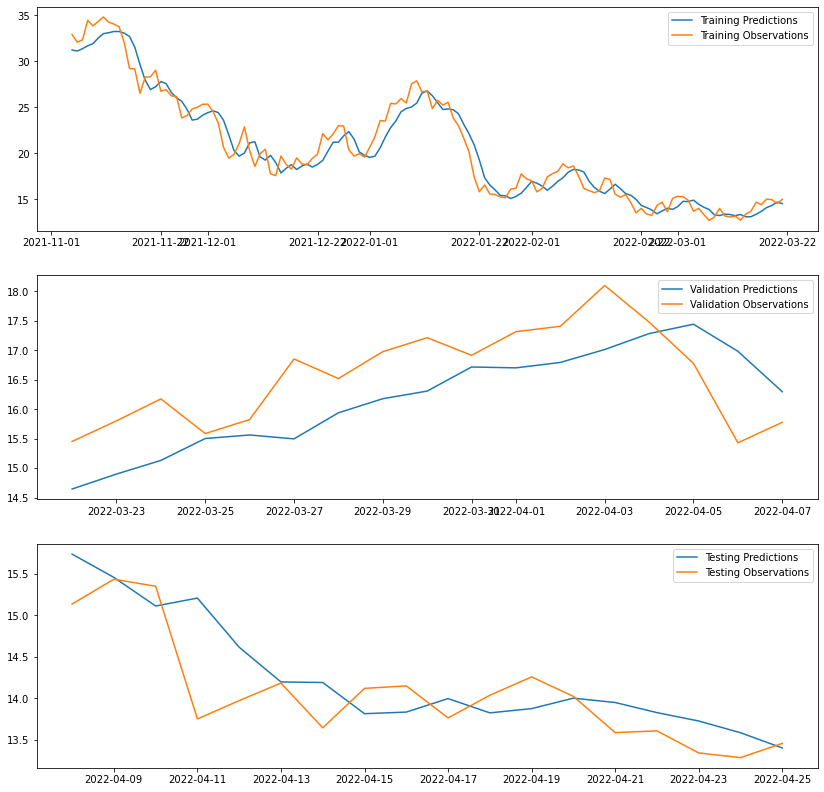

In [26]:
#PREDICT THE VALUES USING THE MODEL
train_predictions = model.predict(X_train).flatten()
val_predictions = model.predict(X_val).flatten()
test_predictions = model.predict(X_test).flatten()


fig,axs = plt.subplots(3, 1, figsize=(14,14))

axs[0].plot(dates_train, train_predictions)
axs[0].plot(dates_train, y_train)
axs[0].legend(['Training Predictions', 'Training Observations'])

axs[1].plot(dates_val, val_predictions)
axs[1].plot(dates_val, y_val)
axs[1].legend(['Validation Predictions', 'Validation Observations'])

axs[2].plot(dates_test, test_predictions)
axs[2].plot(dates_test, y_test)
axs[2].legend(['Testing Predictions', 'Testing Observations'])

plt.savefig('../analysis/LTSM_recursive/'+coin_name +'_modelPredictions'+'.png')

## <font color='#5D6D7E'>Recursive Predictions</font> <a class="anchor" id="twentysixth-bullet"></a>
  [Back to TOC](#toc)

In [27]:
from copy import deepcopy

#Get prediction for future dates recursively based on the previous existing information. Then update the window of days upon
#which the predictions are made

recursive_predictions = []
recursive_dates = np.concatenate([dates_test])

last_window = deepcopy(X_train[-1])

for target_date in recursive_dates:
    next_prediction = model.predict(np.array([last_window])).flatten()
    recursive_predictions.append(next_prediction)
    last_window = np.insert(last_window,0,next_prediction)[:-1]
    

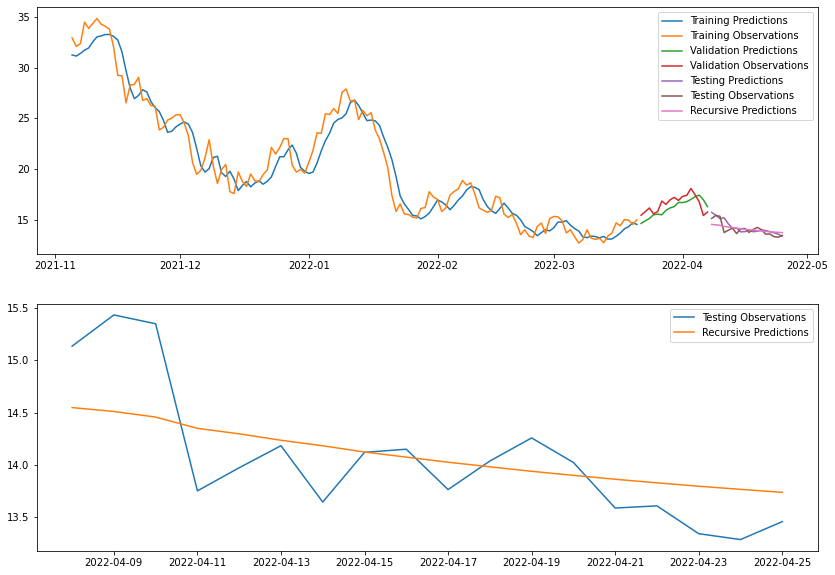

In [28]:
fig,axs = plt.subplots(2, 1, figsize=(14,10))

axs[0].plot(dates_train, train_predictions)
axs[0].plot(dates_train, y_train)
axs[0].plot(dates_val, val_predictions)
axs[0].plot(dates_val, y_val)
axs[0].plot(dates_test, test_predictions)
axs[0].plot(dates_test, y_test)
axs[0].plot(recursive_dates, recursive_predictions)
axs[0].legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])

axs[1].plot(dates_test, y_test)
axs[1].plot(recursive_dates, recursive_predictions)
axs[1].legend(['Testing Observations',
              'Recursive Predictions'])

plt.savefig('../analysis/LTSM_recursive/'+coin_name +'_recursivePredictions'+'.png')